<h1>EMPLOYEE EXPERIENCE ANALYSIS IN LABOR SOCIAL MEDIA</h1>
<h3>APPLYING NLP TECHNIQUES</h3>

# **Natural Language Processing (NLP) or Text Mining**

Steps will be taken:
    1. Data Pre-processing (text data cleaning)
        - Clean text (common steps of cleaning before tokenization)
        - Tokenize text 
        - Corpus done 
    2. Exploratory Data Analysis (EDA): Word Counts or 'Top Words' 
       (initial exploration, for all the corpus in global, for spanish and english reviews)
    3. Sentiment Analisys (NLU): to explore supposed positive and negative reviews, per company
    4. Additional data pre-processing steps (after tokenization, only for english corpus, to improve the later analysis)
        - Document-Term Matrix done
    5. LDA Topic modeling (NLU): only for english reviews, in global, and per company
        - Global LDA model
        - Global LDA model validation (metrics)
        - Global LDA model visualization
        - Improved EDA (word counts) per company
        - LDA model per company
        - LDA model validation (metrics)
        - LDA model visualization
        

<h1>1. Data Pre-Processing: text data cleaning</h1>

When we deal with numerical data, the cleaning process involves removing null values, duplicate data, dealing with outliers, etc, depending on the initial data we have. In other words, as far as this project is concerned, this has been reflected in the cleaning tasks performed on the raw data obtained from the initial scraping of the glassdoor information to create the initial dataset.

On the other hand, when we deal with text data, we must additionally perform other cleaning tasks known as "text pre-processing techniques".

Steps will be taken:
    1. Clean text (remove excess and unnecessary parts of the text)
    2. Tokenize text (split the text into smaller pieces, the most common token size is a word)
    3. Corpus or Document-term Matrix (put the text data into a matrix, so a machine can read it)
    
Data format types:
   - **Corpus**: a collection of texts collected in a dataframe
   - **Document-term matrix**: word counts in matrix format

Within this pre-processing stage, there are common steps to always take to start from a minimum viable product (MVP) and, from there, there are other techniques to apply to iterate and improve the results which I will apply later.

In this phase, I will apply the common steps for pre-processing before tokenization:
- Convert to lowercase
- Remove punctuation
- Remove 'stop words'
- Remove numerical data
- Remove spaces
- Tokenize text

Additional steps for pre-processing after 'tokenization' will be taken in a later phase, which may include the following:
- Create bi-grams or tri-grams
- Stemming / lemmatization
- Parts of speech tagging
- Deal with typos
- Etc

### Importing libraries:

In [1]:
import numpy as np
import pandas as pd

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [4]:
import re #regular expressions library
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from collections import Counter

[nltk_data] Downloading package stopwords to /home/dsc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dsc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/dsc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dsc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
Companies_reviews_v2 = pd.read_csv('Companies_reviews_v2.csv', index_col=0)

In [10]:
Companies_reviews_v2.head()

Company                               Title Rating  \
0  Accenture                    «Aprendes mucho»    4,0   
1  Accenture          «Buen lugar para aprender»    5,0   
2  Accenture                 «Excelente empresa»    5,0   
3  Accenture  «muchas horas proyectos aburridos»    3,0   
4  Accenture                                 «.»    5,0   

                              Role   Location  \
0            Internship Technology  BARCELONA   
1     Technology Consulting Intern  BARCELONA   
2                       Consultant  BARCELONA   
3                        Consultor  BARCELONA   
4                Junior Consultant  BARCELONA   

                                                Pros  \
0   Para el primer empleo esta bien, ya que aprendes   
1  Aprendes mucho acerca de proyectos importantes...   
2  8 dias de vacaciones adicionales\nFormacion co...   
3  Buen ambiente, buen sueldo para ser una consul...   
4  Aprendes mucho, buenos beneficios, buena geren...   

                                             Contras Language  Date_year  \
0                         A veces haces horas extras  Español       2021   
1  Puede ser un poco burocratico para tener acces...  Español       2021   
2                No encuentro desventaja al analisis  Español       2021   
3       Muchas horas, poyectos aburridos e impuestos  Español       2021   
4             hay mucha burocracia para los procesos  Español       2021   

     Region  
0  CATALUÑA  
1  CATALUÑA  
2  CATALUÑA  
3  CATALUÑA  
4  CATALUÑA

In [9]:
Companies_reviews_v2.shape

(9989, 10)

### Selecting the columns that I need:

In [10]:
needed_columns = ['Company', 'Pros', 'Contras', 'Language']
df_preprocessing = Companies_reviews_v2[needed_columns]
df_preprocessing.head()

Company                                               Pros  \
0  Accenture   Para el primer empleo esta bien, ya que aprendes   
1  Accenture  Aprendes mucho acerca de proyectos importantes...   
2  Accenture  8 dias de vacaciones adicionales\nFormacion co...   
3  Accenture  Buen ambiente, buen sueldo para ser una consul...   
4  Accenture  Aprendes mucho, buenos beneficios, buena geren...   

                                             Contras Language  
0                         A veces haces horas extras  Español  
1  Puede ser un poco burocratico para tener acces...  Español  
2                No encuentro desventaja al analisis  Español  
3       Muchas horas, poyectos aburridos e impuestos  Español  
4             hay mucha burocracia para los procesos  Español

### Converting 'Language' column to categorical variable:

In [11]:
df_preprocessing.Language = df_preprocessing.Language.astype('category')
df_preprocessing.Language = df_preprocessing.Language.cat.codes

df_preprocessing.head()

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Company                                               Pros  \
0  Accenture   Para el primer empleo esta bien, ya que aprendes   
1  Accenture  Aprendes mucho acerca de proyectos importantes...   
2  Accenture  8 dias de vacaciones adicionales\nFormacion co...   
3  Accenture  Buen ambiente, buen sueldo para ser una consul...   
4  Accenture  Aprendes mucho, buenos beneficios, buena geren...   

                                             Contras  Language  
0                         A veces haces horas extras         1  
1  Puede ser un poco burocratico para tener acces...         1  
2                No encuentro desventaja al analisis         1  
3       Muchas horas, poyectos aburridos e impuestos         1  
4             hay mucha burocracia para los procesos         1

### Selecting out the reviews positive text (**'Pros Corpus'**): 

In [12]:
positive_text = df_preprocessing['Pros']

### Selecting out the reviews negative text (**'Contras Corpus'**): 

In [13]:
negative_text = df_preprocessing['Contras']

### Converting all the text to lowercase:

In [14]:
to_lowercase = lambda x : x.lower()
positive_text_lower = positive_text.apply(to_lowercase)
negative_text_lower = negative_text.apply(to_lowercase)

### Removing the punctuations from all the text:

In [15]:
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))

#'maketrans' creates a translation table
#first and second arguments are empty because we don't need to trasnlate anything
#'string.punctuation' removes all the punstuations
#In summary, this translation table leaves everything but remove all the punctuations

positive_text_lower_puncs = positive_text_lower.apply(remove_puncs)
negative_text_lower_puncs = negative_text_lower.apply(remove_puncs)

### Removing 'Stopwords':

In [19]:
# Importing into a variable all the stopwords of the Corpus in English
stop_words_eng = set(stopwords.words('english'))

In [20]:
# Importing into a variable all the stopwords of the Corpus in Spanish
stop_words_spa = set(stopwords.words('spanish'))

In [23]:
# Creating functions that return those words that are inside the text and are not stopwords
remove_words_eng = lambda x : ' '.join([word for word in x.split() if word not in stop_words_eng])
remove_words_spa = lambda x : ' '.join([word for word in x.split() if word not in stop_words_spa])

In [24]:
# removing stop words in english and spanish from the 'positive' or 'pros' corpus
positive_text_lower_puncs_stopw = positive_text_lower_puncs.apply(remove_words_eng)
positive_text_lower_puncs_stopw = positive_text_lower_puncs_stopw.apply(remove_words_spa)

In [25]:
# removing stop words in english and spanish from the 'negative' or 'contras' corpus
negative_text_lower_puncs_stopw = negative_text_lower_puncs.apply(remove_words_eng)
negative_text_lower_puncs_stopw = negative_text_lower_puncs_stopw.apply(remove_words_spa)

### Removing numbers:

In [26]:
# creating a function that return those numbers that are inside the text
remove_numbers = lambda x : ' '.join([word for word in x.split() if not word.isdigit()])

In [28]:
# removing numbers fron 'pros' and 'contras' corpus
positive_text_lower_puncs_stopw_nonumbers = positive_text_lower_puncs_stopw.apply(remove_numbers)
negative_text_lower_puncs_stopw_nonumbers = negative_text_lower_puncs_stopw.apply(remove_numbers)

### Removing spaces:

In [33]:
# define a function to remove all the spaces from the text

def remove_spaces(text):
    # replace more than 1 space with 1 space
    merged_spaces = text.replace(r"\s\s+",' ')
    # delete beginning and trailing spaces
    trimmed_spaces = merged_spaces.apply(lambda x: x.strip())
    return trimmed_spaces

In [34]:
# removing spaces fron 'pros' and 'contras' corpus
positive_text_lower_puncs_stopw_nonumbers_nospaces = remove_spaces(positive_text_lower_puncs_stopw_nonumbers)
negative_text_lower_puncs_stopw_nonumbers_nospaces = remove_spaces(negative_text_lower_puncs_stopw_nonumbers)

### Replacing the 'dirty' text for the cleaned text into main dataframe:

In [37]:
#Remember the main dataframe of preprocessing
df_preprocessing.head()

Company                                               Pros  \
0  Accenture   Para el primer empleo esta bien, ya que aprendes   
1  Accenture  Aprendes mucho acerca de proyectos importantes...   
2  Accenture  8 dias de vacaciones adicionales\nFormacion co...   
3  Accenture  Buen ambiente, buen sueldo para ser una consul...   
4  Accenture  Aprendes mucho, buenos beneficios, buena geren...   

                                             Contras  Language  
0                         A veces haces horas extras         1  
1  Puede ser un poco burocratico para tener acces...         1  
2                No encuentro desventaja al analisis         1  
3       Muchas horas, poyectos aburridos e impuestos         1  
4             hay mucha burocracia para los procesos         1

In [38]:
#Replacing dirty for cleaned text (in positive comments):
df_preprocessing.Pros = positive_text_lower_puncs_stopw_nonumbers_nospaces

#Replacing dirty for cleaned text (in negative comments):
df_preprocessing.Contras = negative_text_lower_puncs_stopw_nonumbers_nospaces

#Checking final dataframe
df_preprocessing.head()


/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Company                                               Pros  \
0  Accenture                        primer empleo bien aprendes   
1  Accenture  aprendes acerca proyectos importantes actualid...   
2  Accenture     dias vacaciones adicionales formacion continua   
3  Accenture           buen ambiente buen sueldo ser consultora   
4  Accenture  aprendes buenos beneficios buena gerencia empr...   

                                             Contras  Language  
0                           veces haces horas extras         1  
1  puede ser burocratico tener accesos diferentes...         1  
2                      encuentro desventaja analisis         1  
3          muchas horas poyectos aburridos impuestos         1  
4                          mucha burocracia procesos         1

### Creating a .csv file from the cleaned main dataframe:

In [39]:
df_preprocessing.shape

(9989, 4)

This .csv file will contain 9989 total reviews or rows and four columns:
    - 'Company': the different companies analyzed and categorized
    - 'Pros': supposed positive feedback
    - 'Contras': supposed negative feedback
    - 'Language': language in which the review is written, Spanish or English, categorized in '1' if it is Spanish, and in '0' if it is English.

In [40]:
df_preprocessing.to_csv('Reviews_preprocessing.csv')

### (*)If we want to directly import the .csv file and create a dataframe from it:
##### (with SPANISH & ENGLISH reviews)

In [41]:
reviews_preprocessing = pd.read_csv('Reviews_preprocessing.csv')
reviews_preprocessing = reviews_preprocessing.drop(['Unnamed: 0'], axis = 1)
reviews_preprocessing.head()

Company                                               Pros  \
0  Accenture                        primer empleo bien aprendes   
1  Accenture  aprendes acerca proyectos importantes actualid...   
2  Accenture     dias vacaciones adicionales formacion continua   
3  Accenture           buen ambiente buen sueldo ser consultora   
4  Accenture  aprendes buenos beneficios buena gerencia empr...   

                                             Contras  Language  
0                           veces haces horas extras         1  
1  puede ser burocratico tener accesos diferentes...         1  
2                      encuentro desventaja analisis         1  
3          muchas horas poyectos aburridos impuestos         1  
4                          mucha burocracia procesos         1

### Selecting only the english reviews:

We can see that we have reviews in Spanish (categorized with '1') and reviews in English (categorized with '0') in the dataframe. As the 'Sentiment Score' is only applicable in English, I am going to keep only those reviews within the dataframe that are in English and create a new dataframe from them.

In [42]:
# We observe those reviews within the dataframe that meet or not the condition of being written in English
reviews_preprocessing.loc[:, 'Language'] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
9984    False
9985    False
9986    False
9987    False
9988    False
Name: Language, Length: 9989, dtype: bool

In [43]:
# selecting within the dataframe only those reviews (rows) that meet the previous condition: 
# be written in English and therefore be categorized as '0'

reviews_preprocessing[reviews_preprocessing.loc[:, 'Language'] == 0]

Company                                               Pros  \
164   Accenture                             good environment peers   
165   Accenture          nice environment good young professionals   
166   Accenture                        access big projects clients   
167   Accenture  field consultancy good company start career al...   
168   Accenture                              exposure lot projects   
...         ...                                                ...   
9968   Deloitte  place grow good salary youth environment somet...   
9969   Deloitte  friendly atmosphere hardworking environment co...   
9979     Everis                               kind supportive team   
9980     Everis  depends project work general interesting proje...   
9981     Everis                      good ambient lot oportunities   

                                                Contras  Language  
164                                like consulting area         0  
165   operations consulting salaries opportunities q...         0  
166        quite hierarchical communication always easy         0  
167   depends project project lead journey useful le...         0  
168                          work life balance possible         0  
...                                                 ...       ...  
9968  lots hours unpaid greedy people sometimes seni...         0  
9969  poor worklife balance difficult combine work a...         0  
9979                        lack organization sometimes         0  
9980   much working hours schedule 830h1800h hour lunch         0  
9981         lot burocracy make anithing inside company         0  

[3691 rows x 4 columns]

In [44]:
# creating a new dataframe with only the reviews in English
reviews_preprocessing_eng = reviews_preprocessing[reviews_preprocessing.loc[:, 'Language'] == 0]
reviews_preprocessing_eng.head()

Company                                               Pros  \
164  Accenture                             good environment peers   
165  Accenture          nice environment good young professionals   
166  Accenture                        access big projects clients   
167  Accenture  field consultancy good company start career al...   
168  Accenture                              exposure lot projects   

                                               Contras  Language  
164                               like consulting area         0  
165  operations consulting salaries opportunities q...         0  
166       quite hierarchical communication always easy         0  
167  depends project project lead journey useful le...         0  
168                         work life balance possible         0

In [45]:
reviews_preprocessing_eng.shape

(3691, 4)

This .csv file will contain 3691 total reviews or rows and four columns:
    - 'Company': the different companies analyzed and categorized
    - 'Pros': supposed positive feedback
    - 'Contras': supposed negative comments
    - 'Language': english

### Creating a .csv file from english reviews dataframe:

In [46]:
reviews_preprocessing_eng.to_csv('Reviews_preprocessing_eng.csv')

### (*)If we want to directly import the .csv file and create a dataframe from it:
##### (with only ENGLISH reviews) 

In [9]:
reviews_preprocessing_eng = pd.read_csv('Reviews_preprocessing_eng.csv')
reviews_preprocessing_eng = reviews_preprocessing_eng.drop(['Unnamed: 0'], axis = 1)
reviews_preprocessing_eng.head()

Company                                               Pros  \
0  Accenture                             good environment peers   
1  Accenture          nice environment good young professionals   
2  Accenture                        access big projects clients   
3  Accenture  field consultancy good company start career al...   
4  Accenture                              exposure lot projects   

                                             Contras  Language  
0                               like consulting area         0  
1  operations consulting salaries opportunities q...         0  
2       quite hierarchical communication always easy         0  
3  depends project project lead journey useful le...         0  
4                         work life balance possible         0

<h1>2. Initial Exploratory Data Analysis (EDA): Word Counts or Top Words</h1>

After the cleaning or text preprocessing phase, in which we have put the data into a standard format, the next step will be to take a look at the text data to determine if it makes sense, before proceeding to use NLU techniques.

Python libraries used:
`Matplotlib`
`Seaborn`
`WordCloud`
`Pillow`

In addition, an interactive dashboard in `Tableau` is provided (check the memory)

### Let's visualize the **'Top Words'** or most common words of the text:

To have an initial look at the dataset, I'll first pull out the 'top words' from the entire corpus; and later I will take them out by company to make a comparison.

The most common words in the entire corpus below.

    1. List comprenhension

In [48]:
# create a big list of words out of all the POSITIVE COMMENTS ('PROS CORPUS') within the reviews
positive_words_list = [word for line in positive_text_lower_puncs_stopw for word in line.split()]

In [49]:
# create a big list of words out of all the NEGATIVE COMMENTS ('CONTRAS CORPUS') within the reviews
negative_words_list = [word for line in negative_text_lower_puncs_stopw for word in line.split()]

    2. Word counts

In [50]:
# counting the most 50 repeated words in POSITIVE COMMENTS ('PROS CORPUS')
positive_word_counts = Counter(positive_words_list).most_common(100)
positive_word_counts

[('good', 1578),
 ('buen', 1461),
 ('ambiente', 1355),
 ('trabajo', 1336),
 ('empresa', 1259),
 ('great', 1051),
 ('work', 1036),
 ('company', 952),
 ('people', 789),
 ('environment', 676),
 ('gran', 661),
 ('proyectos', 642),
 ('gente', 606),
 ('buena', 586),
 ('equipo', 581),
 ('trabajar', 517),
 ('beneficios', 479),
 ('laboral', 476),
 ('oportunidades', 468),
 ('buenos', 463),
 ('compañeros', 463),
 ('working', 441),
 ('lot', 436),
 ('flexibilidad', 431),
 ('aprendizaje', 427),
 ('team', 414),
 ('benefits', 414),
 ('profesional', 392),
 ('nice', 384),
 ('opportunities', 378),
 ('aprender', 376),
 ('flexible', 368),
 ('salary', 364),
 ('projects', 359),
 ('personal', 343),
 ('learn', 342),
 ('salario', 339),
 ('grandes', 335),
 ('experiencia', 329),
 ('si', 314),
 ('formación', 313),
 ('bien', 309),
 ('culture', 307),
 ('muchas', 300),
 ('career', 296),
 ('carrera', 290),
 ('sueldo', 288),
 ('buenas', 284),
 ('cultura', 282),
 ('horario', 279),
 ('international', 273),
 ('learning', 

In [51]:
#Counting the most 50 repeated words in NEGATIVE COMMENTS ('CONTRAS CORPUS')
negative_word_counts = Counter(negative_words_list).most_common(100)
negative_word_counts

[('trabajo', 1256),
 ('empresa', 917),
 ('horas', 867),
 ('work', 834),
 ('company', 701),
 ('si', 538),
 ('people', 504),
 ('management', 502),
 ('muchas', 480),
 ('salary', 468),
 ('hours', 463),
 ('salario', 459),
 ('personal', 421),
 ('veces', 387),
 ('sueldo', 383),
 ('ser', 373),
 ('many', 369),
 ('working', 367),
 ('proyectos', 352),
 ('profesional', 351),
 ('falta', 337),
 ('low', 336),
 ('bajo', 330),
 ('gente', 330),
 ('difícil', 324),
 ('tiempo', 316),
 ('sometimes', 310),
 ('long', 308),
 ('trabajar', 301),
 ('get', 301),
 ('mucha', 299),
 ('vida', 297),
 ('lot', 296),
 ('career', 291),
 ('poca', 282),
 ('good', 282),
 ('empleados', 281),
 ('puede', 277),
 ('bad', 271),
 ('time', 270),
 ('much', 267),
 ('proyecto', 266),
 ('lack', 261),
 ('demasiado', 259),
 ('dont', 243),
 ('ninguna', 237),
 ('laboral', 236),
 ('solo', 231),
 ('carrera', 227),
 ('equipo', 225),
 ('bajos', 221),
 ('hacer', 221),
 ('personas', 219),
 ('employees', 214),
 ('extra', 213),
 ('salarios', 212),
 

We can observe lists with the 100 most repeated words in both positive and negative corpus and, in addition, it also returns the number of times each word appears repeated within the text.


    3. Visualization ('Bar Charts' and 'WordClouds')

Next, I will import these lists into dataframes for both, positive and negative comments, and calling the both columns 'word' and 'frequency'. Also, I will create __*bar charts*__ and __*word clouds*__ to visualize the most common words.

For the visualization, `matplotlib` is a basic library that enables many other libraries to run and plot on its base including `seaborn` or `wordcloud` that I will use. And the `pillow` library is a package that enables image reading. 

In [5]:
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

sns.set(style='darkgrid')

    3A. Exploration of the top words in all data

In [54]:
df_positive_word_counts = pd.DataFrame(positive_word_counts)
df_positive_word_counts.columns = ['word', 'frequency']

Text(0.5, 1.0, '35 Most Common Words (in supposed positive reviews)')

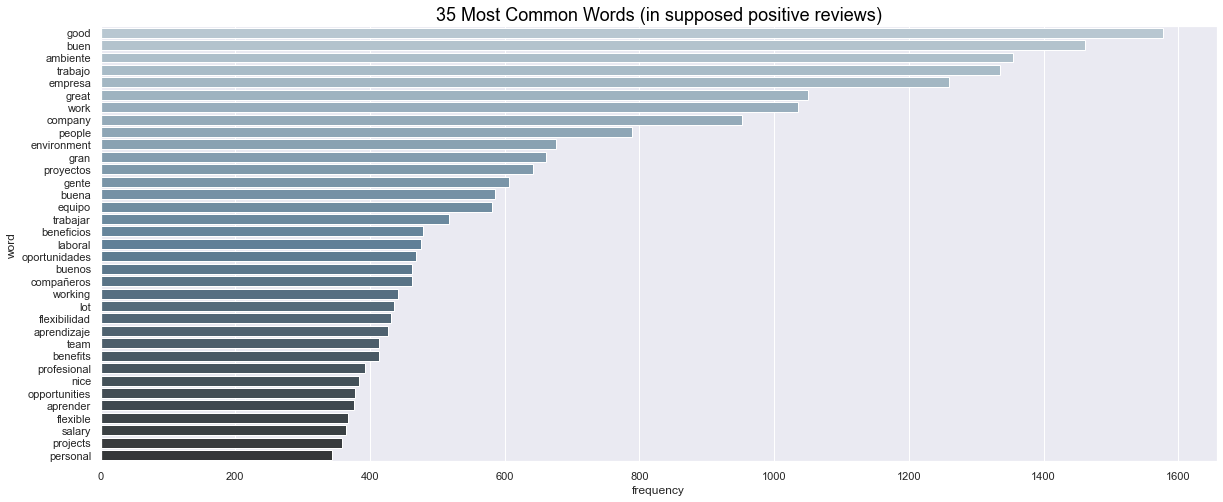

In [58]:
#vertical bar chart
plt.figure(figsize=(20, 8))
sns.barplot(data=df_positive_word_counts.head(35), y='word', x='frequency', palette='Blues_d', saturation=.4)
plt.title('35 Most Common Words (in supposed positive reviews)', fontsize=18, color='Black')

In [59]:
df_negative_word_counts = pd.DataFrame(negative_word_counts)
df_negative_word_counts.columns = ['word', 'frequency']

Text(0.5, 1.0, '35 Most Common Words (in supposed negative reviews)')

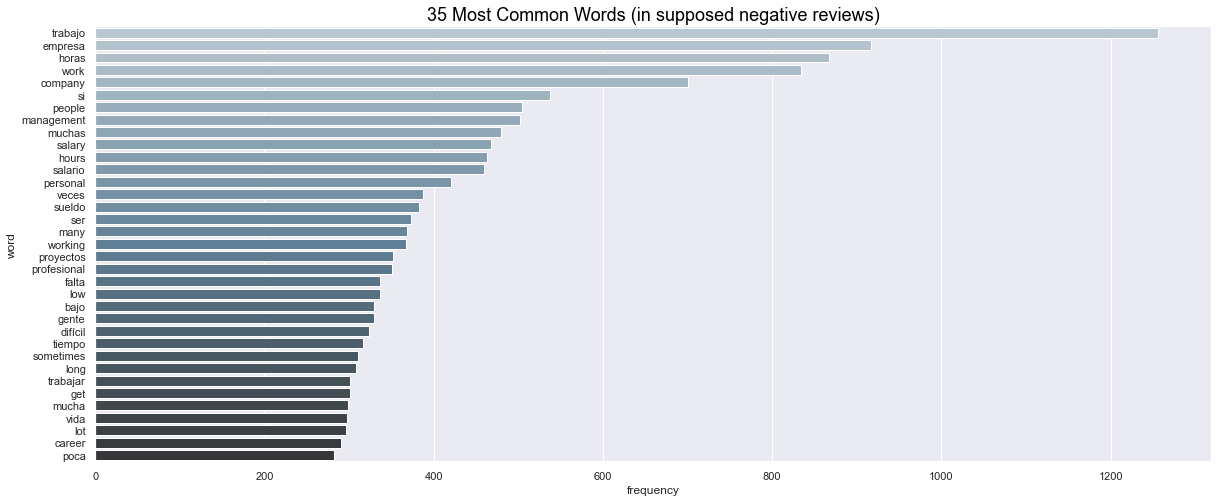

In [60]:
plt.figure(figsize=(20, 8))
sns.barplot(data=df_negative_word_counts.head(35), y='word', x='frequency', palette='Blues_d', saturation=.4)
plt.title('35 Most Common Words (in supposed negative reviews)', fontsize=18, color='Black')

##### Installing the WordCloud library:

In [72]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 3.2MB/s 


In [7]:
# Wordcloud: Importing library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pillow:: Importing library
from PIL import Image

The only required argument for a WordCloud object is the text, while all others are optional.

So let's start with a example: using the first observation description as the input for the wordcloud. The three steps are:

    1. Extract the review (text document)
    2. Create and generate a wordcloud image
    3. Display the cloud using matplotlib

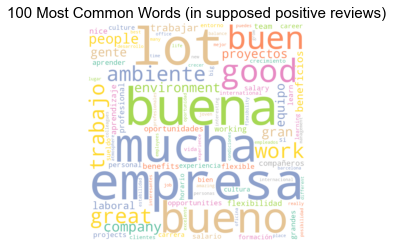

In [70]:
# Next, with all the words of the dataframe:
text1 = " ".join(word for word in df_positive_word_counts.word)

# Create the wordcloud object (with the 35 most common words)
wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('100 Most Common Words (in supposed positive reviews)', fontsize=15, color='Black')
plt.show()

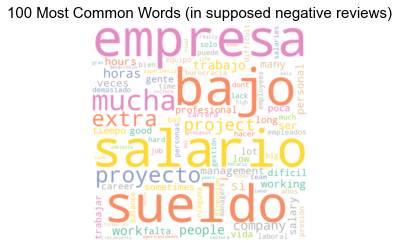

In [72]:
#Next, with all the words of the dataframe:
text2 = " ".join(word for word in df_negative_word_counts.word)

# Create the wordcloud object (with the 35 most common words)
wordcloud2 = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(text2)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('100 Most Common Words (in supposed negative reviews)', fontsize=15, color='Black')
plt.show()

After this exploratory analysis where we can visualize the most common words of our text data, we must ask ourselves:
- Do the most common words ('top words') make sense?
- Should we keep cleaning the data, perhaps removing additional 'stop words'?

(*) Answers are detailed in memory.

    3B. Exploration of the 'Top Words' per company

* I will do it only with the english corpus
* I explain this point after applying advanced text preprocessing techniques: bigrams, trigrams, stemming and lemmatization; and before the Topic Modeling - let's take a look at that section 

<h1>3. Sentiment Analysis (NLU)</h1>

What I will do, will be to label each review as positive, negative or neutral, per company. to later count the total number of labels for each feeling and company and, in this way, I will be able to visualize and determine which companies generate a more positive feeling and which, on the contrary, generate more negative experiences or feelings.

I will use `NLTK` and `VADER` package for the sentiment analysis of the reviews. Because Vader is optimized for social media data and can yield good results when it is used with data from social media such as Twitter, Facebook, etc (and it would be less effective in very long texts, such as documentation and books).

I’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related, because they all add up to 1 and can’t be negative. But also, I'll use the 'Compound Polarity' score metric, that is calculated differently. It’s not just an average, and it can range from -1 to 1. It's a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive):
- positive sentiment : (compound score > 0) 
- neutral sentiment : (compound score = 0) 
- negative sentiment : (compound score < 0)

### Getting the polarity scores for each review:

In [73]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x) 

In [74]:
# sentiment scores for each supposed positive review ('Pros' text)
sentiment_scores_pros = reviews_preprocessing_eng.Pros.apply(ps)

In [76]:
# sentiment scores for each supposed negative review ('Contras' text)
sentiment_scores_contras = reviews_preprocessing_eng.Contras.apply(ps)

AttributeError: 'float' object has no attribute 'encode'

In [77]:
# sentiment scores for each supposed negative review ('Contras' text converted into 'str' object, because there were 'float' objects within the text as the last issue shows)
sentiment_scores_contras = reviews_preprocessing_eng.Contras.astype(str).apply(ps)

In [80]:
# Creating dataframes with the sentiment scores

# for supposed positive reviews
df_sentiment_pros = pd.DataFrame(data = list(sentiment_scores_pros))

# for supposed negative reviews
df_sentiment_contras = pd.DataFrame(data = list(sentiment_scores_contras))

In [81]:
# dataframe of sentiment scores of supposed positive reviews
df_sentiment_pros.head()

neg    neu    pos  compound
0  0.00  0.408  0.592    0.4404
1  0.00  0.345  0.655    0.6908
2  0.00  1.000  0.000    0.0000
3  0.19  0.652  0.158   -0.1531
4  0.00  1.000  0.000    0.0000

In [82]:
# dataframe of sentiment scores of supposed negative reviews
df_sentiment_contras.head()

neg    neu    pos  compound
0  0.00  0.444  0.556    0.3612
1  0.34  0.400  0.260   -0.2006
2  0.00  0.580  0.420    0.4404
3  0.00  0.707  0.293    0.4404
4  0.00  1.000  0.000    0.0000

### Labeling the scores based on the compound polarity value:

In [83]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
df_sentiment_pros['label'] = df_sentiment_pros['compound'].apply(labelize)
df_sentiment_contras['label'] = df_sentiment_contras['compound'].apply(labelize)

In [84]:
df_sentiment_pros.head()

neg    neu    pos  compound     label
0  0.00  0.408  0.592    0.4404  positive
1  0.00  0.345  0.655    0.6908  positive
2  0.00  1.000  0.000    0.0000   neutral
3  0.19  0.652  0.158   -0.1531  negative
4  0.00  1.000  0.000    0.0000   neutral

In [85]:
df_sentiment_contras.head()

neg    neu    pos  compound     label
0  0.00  0.444  0.556    0.3612  positive
1  0.34  0.400  0.260   -0.2006  negative
2  0.00  0.580  0.420    0.4404  positive
3  0.00  0.707  0.293    0.4404  positive
4  0.00  1.000  0.000    0.0000   neutral

### Joining the dataframes:

    - Let's remember the initial dataframe for just english reviews that we had

In [86]:
reviews_preprocessing_eng.head()

Company                                               Pros  \
0  Accenture                             good environment peers   
1  Accenture          nice environment good young professionals   
2  Accenture                        access big projects clients   
3  Accenture  field consultancy good company start career al...   
4  Accenture                              exposure lot projects   

                                             Contras  Language  
0                               like consulting area         0  
1  operations consulting salaries opportunities q...         0  
2       quite hierarchical communication always easy         0  
3  depends project project lead journey useful le...         0  
4                         work life balance possible         0

    - Joining the label with the supposed 'Positive' reviews dataframe (with text in 'Pros' column)

In [87]:
sentimentdata_pros = reviews_preprocessing_eng.iloc[:,[0,1]].join(df_sentiment_pros.label)
sentimentdata_pros.head()

Company                                               Pros     label
0  Accenture                             good environment peers  positive
1  Accenture          nice environment good young professionals  positive
2  Accenture                        access big projects clients   neutral
3  Accenture  field consultancy good company start career al...  negative
4  Accenture                              exposure lot projects   neutral

    - Joining the 'label' with the supposed 'Negative' reviews dataframe (with text in 'Contras' column)

In [88]:
sentimentdata_contras = reviews_preprocessing_eng.iloc[:,[0,2]].join(df_sentiment_contras.label)
sentimentdata_contras.head()

Company                                            Contras     label
0  Accenture                               like consulting area  positive
1  Accenture  operations consulting salaries opportunities q...  negative
2  Accenture       quite hierarchical communication always easy  positive
3  Accenture  depends project project lead journey useful le...  positive
4  Accenture                         work life balance possible   neutral

### Plotting the sentiment score counts:

    - Sentiment score from 'pros' reviews

In [89]:
sentimentdata_pros_counts = sentimentdata_pros.label.value_counts().reset_index()
sentimentdata_pros_counts

index  label
0  positive   3221
1   neutral    386
2  negative     84

Text(0.5, 1.0, 'Sentiment Score counts of positive reviews')

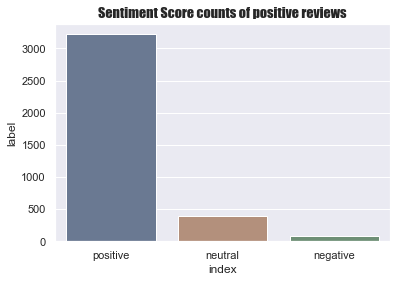

In [90]:
sns.barplot(x='index', y='label', data=sentimentdata_pros_counts, saturation=.4)
plt.title('Sentiment Score counts of positive reviews', fontsize=14, fontfamily='fantasy')

    - Sentiment score from 'contras' reviews

In [91]:
sentimentdata_contras_counts = sentimentdata_contras.label.value_counts().reset_index()
sentimentdata_contras_counts

index  label
0  positive   1454
1  negative   1277
2   neutral    960

Text(0.5, 1.0, 'Sentiment Score counts of negative reviews')

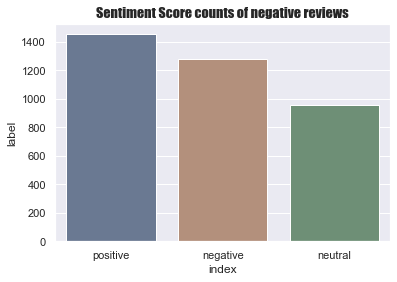

In [92]:
sns.barplot(x='index', y='label', data=sentimentdata_contras_counts, saturation=.4)
plt.title('Sentiment Score counts of negative reviews', fontsize=14, fontfamily='fantasy')

    - Sentiment Score from supposed 'positive' reviews and per company

In [93]:
sentimentdata_pros_counts_percompany = sentimentdata_pros.groupby(['label', 'Company'])['label'].count()
sentimentdata_pros_counts_percompany

label     Company   
negative  Accenture       8
          Amadeus         1
          Amazon          2
          Atos            3
          BBVA            3
                       ... 
positive  Telefonica    155
          TravelPerk     84
          Typeform       65
          Vistaprint     57
          eDreams       117
Name: label, Length: 95, dtype: int64

In [94]:
sentimentdata_pros_counts_percompany = sentimentdata_pros[['Company', 'label', 'Pros']].groupby(['Company', 'label']).count().reset_index()
sentimentdata_pros_counts_percompany.columns = ['company', 'label', 'counts']
sentimentdata_pros_counts_percompany.head(30)

company     label  counts
0         Accenture  negative       8
1         Accenture   neutral      57
2         Accenture  positive     275
3          Adevinta  positive      42
4           Amadeus  negative       1
5           Amadeus   neutral       7
6           Amadeus  positive     123
7            Amazon  negative       2
8            Amazon   neutral      15
9            Amazon  positive     232
10             Atos  negative       3
11             Atos   neutral       9
12             Atos  positive      41
13             BBVA  negative       3
14             BBVA   neutral      11
15             BBVA  positive     128
16  Banco Santander  negative       4
17  Banco Santander   neutral      20
18  Banco Santander  positive     116
19        Caixabank  positive      22
20        Capgemini  negative       2
21        Capgemini   neutral      13
22        Capgemini  positive      43
23           Criteo  negative       2
24           Criteo   neutral       4
25           Criteo  positive     116
26   DXC Technology  negative       1
27   DXC Technology   neutral       4
28   DXC Technology  positive      28
29         Deloitte  negative       4

    - Sentiment Score from 'contras' reviews and per company

In [95]:
sentimentdata_contras_counts_percompany = sentimentdata_contras.groupby(['label', 'Company'])['label'].count()
sentimentdata_contras_counts_percompany

label     Company   
negative  Accenture     115
          Adevinta       11
          Amadeus        36
          Amazon        103
          Atos           24
                       ... 
positive  Telefonica     67
          TravelPerk     49
          Typeform       43
          Vistaprint     31
          eDreams        64
Name: label, Length: 108, dtype: int64

In [96]:
sentimentdata_contras_counts_percompany = sentimentdata_contras[['Company', 'label', 'Contras']].groupby(['Company', 'label']).count().reset_index()
sentimentdata_contras_counts_percompany.columns = ['company', 'label', 'counts']
sentimentdata_contras_counts_percompany.head(30)

company     label  counts
0         Accenture  negative     115
1         Accenture   neutral     110
2         Accenture  positive     114
3          Adevinta  negative      11
4          Adevinta   neutral      14
5          Adevinta  positive      17
6           Amadeus  negative      36
7           Amadeus   neutral      28
8           Amadeus  positive      67
9            Amazon  negative     103
10           Amazon   neutral      55
11           Amazon  positive      91
12             Atos  negative      24
13             Atos   neutral       9
14             Atos  positive      20
15             BBVA  negative      46
16             BBVA   neutral      45
17             BBVA  positive      51
18  Banco Santander  negative      45
19  Banco Santander   neutral      45
20  Banco Santander  positive      50
21        Caixabank  negative       9
22        Caixabank   neutral       6
23        Caixabank  positive       7
24        Capgemini  negative      25
25        Capgemini   neutral       7
26        Capgemini  positive      26
27           Criteo  negative      35
28           Criteo   neutral      26
29           Criteo  positive      61

    - Sentiment Score globaly (from all dataset)

In [97]:
# joining the both dataframes
sentimentdata_pros_rename = sentimentdata_pros
sentimentdata_pros_rename.columns = ['company', 'review', 'label']
sentimentdata_contras_rename = sentimentdata_contras
sentimentdata_contras_rename.columns = ['company', 'review', 'label']

sentimentdata_global = sentimentdata_pros_rename.append(sentimentdata_contras_rename)
sentimentdata_global

company                                             review     label
0     Accenture                             good environment peers  positive
1     Accenture          nice environment good young professionals  positive
2     Accenture                        access big projects clients   neutral
3     Accenture  field consultancy good company start career al...  negative
4     Accenture                              exposure lot projects   neutral
...         ...                                                ...       ...
3686   Deloitte  lots hours unpaid greedy people sometimes seni...  negative
3687   Deloitte  poor worklife balance difficult combine work a...  negative
3688     Everis                        lack organization sometimes  negative
3689     Everis   much working hours schedule 830h1800h hour lunch   neutral
3690     Everis         lot burocracy make anithing inside company   neutral

[7382 rows x 3 columns]

In [98]:
sentimentdata_global_counts = sentimentdata_global.label.value_counts().reset_index()
sentimentdata_global_counts

index  label
0  positive   4675
1  negative   1361
2   neutral   1346

Text(0.5, 1.0, 'Global Sentiment Score Counts')

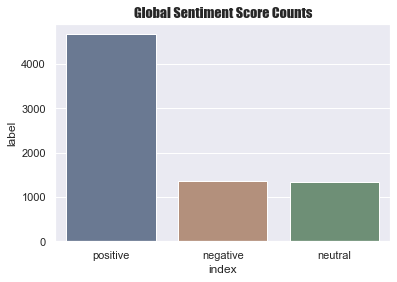

In [99]:
sns.barplot(x='index', y='label', data=sentimentdata_global_counts, saturation=.4)
plt.title('Global Sentiment Score Counts', fontsize=14, fontfamily='fantasy')

    - Sentiment Score globaly (from all dataset) and per company

In [100]:
# counting the labels
sentimentdata_global_counts_percompany = sentimentdata_global[['company', 'label', 'review']].groupby(['company', 'label']).count().reset_index()
sentimentdata_global_counts_percompany.columns = ['company', 'label', 'counts']
sentimentdata_global_counts_percompany.head(30)

company     label  counts
0         Accenture  negative     123
1         Accenture   neutral     167
2         Accenture  positive     389
3          Adevinta  negative      11
4          Adevinta   neutral      14
5          Adevinta  positive      59
6           Amadeus  negative      37
7           Amadeus   neutral      35
8           Amadeus  positive     190
9            Amazon  negative     105
10           Amazon   neutral      70
11           Amazon  positive     323
12             Atos  negative      27
13             Atos   neutral      18
14             Atos  positive      61
15             BBVA  negative      49
16             BBVA   neutral      56
17             BBVA  positive     179
18  Banco Santander  negative      49
19  Banco Santander   neutral      65
20  Banco Santander  positive     166
21        Caixabank  negative       9
22        Caixabank   neutral       6
23        Caixabank  positive      29
24        Capgemini  negative      27
25        Capgemini   neutral      20
26        Capgemini  positive      69
27           Criteo  negative      37
28           Criteo   neutral      30
29           Criteo  positive     177

In [105]:
plot_sentimentdata_global_counts_percompany = sentimentdata_global_counts_percompany.groupby(['company', 'label'])['counts'].value_counts()
plot_sentimentdata_global_counts_percompany.head(50)

company          label     counts
Accenture        negative  123       1
                 neutral   167       1
                 positive  389       1
Adevinta         negative  11        1
                 neutral   14        1
                 positive  59        1
Amadeus          negative  37        1
                 neutral   35        1
                 positive  190       1
Amazon           negative  105       1
                 neutral   70        1
                 positive  323       1
Atos             negative  27        1
                 neutral   18        1
                 positive  61        1
BBVA             negative  49        1
                 neutral   56        1
                 positive  179       1
Banco Santander  negative  49        1
                 neutral   65        1
                 positive  166       1
Caixabank        negative  9         1
                 neutral   6         1
                 positive  29        1
Capgemini        negative  27 

    - Creating a dataframe with the sentiments counts per company

In [120]:
df_sentiment_global_counts_percompany = pd.DataFrame(sentimentdata_global_counts_percompany)
df_sentiment_global_counts_percompany.columns = ['company', 'sentiment', 'counts']

In [121]:
df_sentiment_global_counts_percompany.head()

company sentiment  counts
0  Accenture  negative     123
1  Accenture   neutral     167
2  Accenture  positive     389
3   Adevinta  negative      11
4   Adevinta   neutral      14

    - Creating a .csv file with the sentiments counts per company

In [123]:
df_sentiment_global_counts_percompany.to_csv('sentimentcounts_percompany.csv')

### Explore an interactive dashboard in Tableau:

Link: https://public.tableau.com/views/EDA2SentimentAnalysis/Dashboard1?:language=es-ES&:display_count=n&:origin=viz_share_link

The description and interaction are detailed in memory.

<h1>4. Additional Data Pre-processing</h1>

    - Setup the environment: installing the library

`Gensim`

In [60]:
!pip install gensim

     |████████████████████████████████| 24.1 MB 23.4 MB/s            
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)


    - Preparing the text for the analysis

In [10]:
# Importing the dataset after pre-processing (only with the english reviews)
reviews_preprocessing_eng.head()

Company                                               Pros  \
0  Accenture                             good environment peers   
1  Accenture          nice environment good young professionals   
2  Accenture                        access big projects clients   
3  Accenture  field consultancy good company start career al...   
4  Accenture                              exposure lot projects   

                                             Contras  Language  
0                               like consulting area         0  
1  operations consulting salaries opportunities q...         0  
2       quite hierarchical communication always easy         0  
3  depends project project lead journey useful le...         0  
4                         work life balance possible         0

In [13]:
# Select supposed 'Positives' reviews ('pros' data)
prosdata_lda = reviews_preprocessing_eng.iloc[:,[0,1]]
prosdata_lda = prosdata_lda.set_index('Company')
prosdata_lda.index.rename('Company', inplace=True)
prosdata_lda

Pros
Company                                                     
Accenture                             good environment peers
Accenture          nice environment good young professionals
Accenture                        access big projects clients
Accenture  field consultancy good company start career al...
Accenture                              exposure lot projects
...                                                      ...
Deloitte   place grow good salary youth environment somet...
Deloitte   friendly atmosphere hardworking environment co...
Everis                                  kind supportive team
Everis     depends project work general interesting proje...
Everis                         good ambient lot oportunities

[3691 rows x 1 columns]

In [14]:
# Select supposed 'Negatives' reviews ('contras' data)
contrasdata_lda = reviews_preprocessing_eng.iloc[:,[0,2]]
contrasdata_lda = contrasdata_lda.set_index('Company')
contrasdata_lda.index.rename('Company', inplace=True)
contrasdata_lda

Contras
Company                                                     
Accenture                               like consulting area
Accenture  operations consulting salaries opportunities q...
Accenture       quite hierarchical communication always easy
Accenture  depends project project lead journey useful le...
Accenture                         work life balance possible
...                                                      ...
Deloitte   lots hours unpaid greedy people sometimes seni...
Deloitte   poor worklife balance difficult combine work a...
Everis                           lack organization sometimes
Everis      much working hours schedule 830h1800h hour lunch
Everis            lot burocracy make anithing inside company

[3691 rows x 1 columns]

In [15]:
# mixing both, supposed positive and negative reviews in the same column, to analyze them together
prosdata_lda.columns = ['review']
contrasdata_lda.columns = ['review']
mixdata_lda = prosdata_lda.append(contrasdata_lda)
mixdata_lda

review
Company                                                     
Accenture                             good environment peers
Accenture          nice environment good young professionals
Accenture                        access big projects clients
Accenture  field consultancy good company start career al...
Accenture                              exposure lot projects
...                                                      ...
Deloitte   lots hours unpaid greedy people sometimes seni...
Deloitte   poor worklife balance difficult combine work a...
Everis                           lack organization sometimes
Everis      much working hours schedule 830h1800h hour lunch
Everis            lot burocracy make anithing inside company

[7382 rows x 1 columns]

### Creating a .csv file with the dataframe:

In [16]:
mixdata_lda.to_csv('mixdata_lda.csv')

### (*)If we want to directly import the .csv file and create a dataframe from it:
##### (with all the english reviews, from 'Pros' and 'Contras' corpus)

In [19]:
mixdata_lda = pd.read_csv('mixdata_lda.csv')
mixdata_lda.head()

Company                                             review
0  Accenture                             good environment peers
1  Accenture          nice environment good young professionals
2  Accenture                        access big projects clients
3  Accenture  field consultancy good company start career al...
4  Accenture                              exposure lot projects

    - Creating a tokenized object and removing stop words

Now, I will transform the text data in a format that will serve as an input for training the LDA model, starting by **tokenizing the text** and **removing stopwords**, because I will take the opportunity to add and remove additional stop words that I have seen in the previous word counts that are representative in the text but are not relevant.

I will define functions for both processes.

In [8]:
import gensim
from gensim.utils import simple_preprocess
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer

In [20]:
# creating a list with the stop words and extending the list with additional ones that I want to remove
stop_words_lda = stopwords.words('english')
stop_words_lda.extend(['good', 'great', 'nice', 'bit', 'get', 
                       'many', 'ok', 'one', 'much', 'really', 'good', 'new', 'bad', 'fast', 
                       'yes', 'youre', 'youll', 'from', 'time', 'use', 'easy', 'area', 'bank', 
                       'best', 'ibm', 'cons', 'dont', 'like', 'need', 'even', 'would', 'could',
                       'want', 'nothing', 'think', 'well', 'stay'])

# define a function to tokenize the text
## and the sentences to be tokenized
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# define a function to remove stop words       
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words_lda] for doc in texts]


In [21]:
# tokenized object
datalda = mixdata_lda.review.values.tolist()
datalda_words = sent_to_words(datalda)   #el original es datalda_words = list(sent_to_words(datalda))

# removing stop words
datalda_words = remove_stopwords(datalda_words)

datalda_words[:20]

[['environment', 'peers'],
 ['environment', 'young', 'professionals'],
 ['access', 'big', 'projects', 'clients'],
 ['field',
  'consultancy',
  'company',
  'start',
  'career',
  'almost',
  'always',
  'front',
  'technologies',
  'worklife',
  'balance'],
 ['exposure', 'lot', 'projects'],
 ['continuous', 'learning', 'wide', 'exposure', 'teamwork', 'training'],
 ['big', 'company', 'clients', 'endless', 'options'],
 ['work', 'environment', 'department'],
 ['learn', 'different', 'industries'],
 ['course', 'team', 'first', 'contact', 'technology'],
 ['high', 'learning', 'curve', 'big', 'company'],
 ['work', 'home', 'international', 'projects', 'colleagues'],
 ['capability',
  'network',
  'department',
  'international',
  'unit',
  'support',
  'local',
  'markets',
  'focusing',
  'supply',
  'chain',
  'operations',
  'cool',
  'departement',
  'always',
  'big',
  'clients',
  'lot',
  'international',
  'travels'],
 ['atmosphere', 'analysts'],
 ['work'],
 ['learn', 'dynamic', 'comp

    - Creating a bigram and trigram models

N-grams are neighbouring sequences of items (words, letters or symbols) in a document.

Gensim detects a bigram if a scoring function for two words exceeds a threshold (which is a parameter for Phrases).

In [10]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [22]:
# Build the bigram and trigram models
bigram_phrases = gensim.models.Phrases(datalda_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram_phrases = gensim.models.Phrases(bigram_phrases[datalda_words], threshold=50)  

# Create an object. Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram_phrases)
trigram_mod = gensim.models.phrases.Phraser(trigram_phrases)

# See trigram example
#print(trigram_mod[bigram_mod[datalda_words[20]]])

# define the function for bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# define the function for trigrams
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [23]:
# form bigrams
datalda_bigrams = make_bigrams(datalda_words)

# form trigrams
datalda_bigrams_trigrams = make_trigrams(datalda_bigrams)

datalda_bigrams_trigrams[40:50]

[['group', 'decent', 'pay', 'lots', 'room', 'advancement'],
 ['place', 'big', 'company', 'cv'],
 ['benefits', 'flexibility', 'private_health_insurance', 'tickets_restaurant'],
 ['collaborative',
  'team',
  'management',
  'actually',
  'cares',
  'constant',
  'feedback',
  'continuous',
  'training',
  'areas',
  'free_coffee',
  'multiple',
  'events'],
 ['lot',
  'different',
  'projects',
  'around',
  'world',
  'technologies',
  'lot',
  'opportunities',
  'make',
  'business',
  'relationships'],
 ['expenses', 'dynamic', 'environment', 'young', 'people', 'learning', 'pace'],
 ['modern',
  'culture',
  'flexible',
  'working',
  'hours',
  'home',
  'working',
  'feel',
  'consider',
  'smart',
  'responsible',
  'trustworthy'],
 ['company', 'start', 'working', 'learn', 'lot', 'specially', 'office'],
 ['working', 'environment', 'offices', 'collegaues'],
 ['team', 'decent', 'salaries', 'bonuses']]

In [24]:
datalda_bigrams_trigrams[50:70]

[['flexible_schedule',
  'lot',
  'learning',
  'cultivate',
  'emotional',
  'intelligence',
  'lot',
  'team',
  'work',
  'work',
  'client'],
 ['colleagues', 'learn', 'experience'],
 ['exposed',
  'big',
  'clients',
  'learn',
  'handle',
  'bureaucracy',
  'without',
  'experience',
  'place',
  'start',
  'usually',
  'wages',
  'little',
  'market',
  'without',
  'taking_account',
  'extrahours',
  'learn',
  'sell',
  'products',
  'team',
  'building',
  'place',
  'work',
  'always',
  'organize',
  'events',
  'meet',
  'colleagues',
  'activities',
  'dinners',
  'figure',
  'mentorship',
  'key',
  'assigned',
  'senior',
  'manager',
  'helps',
  'life',
  'company'],
 ['benefits',
  'private_health_insurance',
  'flexibility',
  'timeoff',
  'policies',
  'might',
  'promoted',
  'depends',
  'grades',
  'past',
  'years',
  'set',
  'bosses',
  'yearly',
  'meeting',
  'banding',
  'bosses',
  'might',
  'ruin',
  'career',
  'opportunities',
  'meetings',
  'making',

I can see examples most of all of bigrams such as **'tickets_restaurant'** or **'social_benefits'** or **'free_coffee'** or **'learning_curve'** or **'career_progression'** or **'flexible_schedule'** or **'worklife_balance'** or **'long_term'** or **'long_hours'** or **'continuous_improvement'**; as well as some examples of trigrams such as **'private_health_insurance'**.

    - Stemming & Lemmatization

Both are text normalization techniques.

I will use the `nltk.stem.wordnet` library for this process, because I have issues to import the 'gensim.utils' library. 

How to use it?  

Download Wordnet from nltk:
   - import nltk 
   - nltk.download(‘wordnet’) 
   - nltk.download(‘averaged_perceptron_tagger’)
   
(*) it is already installed 

In [11]:
from gensim.utils import Lemmatize

ImportError: cannot import name 'Lemmatize' from 'gensim.utils' (/home/dsc/anaconda3/lib/python3.7/site-packages/gensim/utils.py)

In [74]:
# libraries already imported:

#from nltk.stem import PorterStemmer, WordNetLemmatizer
#from nltk.corpus import wordnet
#from nltk.tokenize import word_tokenize

In [49]:
# initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# define a function that will return the lemma of each word
def sent_to_lemma(lists):
    for l in lists:
        for word in l: 
            print('Lemma of ' + word + ': ' + lemmatizer.lemmatize(word))

In [50]:
lemma_words = sent_to_lemma(datalda_bigrams_trigrams)
lemma_words[:3]

Lemma of environment: environment
Lemma of peers: peer
Lemma of environment: environment
Lemma of young: young
Lemma of professionals: professional
Lemma of access: access
Lemma of big: big
Lemma of projects: project
Lemma of clients: client
Lemma of field: field
Lemma of consultancy: consultancy
Lemma of company: company
Lemma of start: start
Lemma of career: career
Lemma of almost: almost
Lemma of always: always
Lemma of front: front
Lemma of technologies: technology
Lemma of worklife_balance: worklife_balance
Lemma of exposure: exposure
Lemma of lot: lot
Lemma of projects: project
Lemma of continuous: continuous
Lemma of learning: learning
Lemma of wide: wide
Lemma of exposure: exposure
Lemma of teamwork: teamwork
Lemma of training: training
Lemma of big: big
Lemma of company: company
Lemma of clients: client
Lemma of endless: endless
Lemma of options: option
Lemma of work: work
Lemma of environment: environment
Lemma of department: department
Lemma of learn: learn
Lemma of differen

TypeError: 'NoneType' object is not subscriptable

    - Inserting the clean text into the dataframe

In [25]:
mixdata_lda.head()

Company                                             review
0  Accenture                             good environment peers
1  Accenture          nice environment good young professionals
2  Accenture                        access big projects clients
3  Accenture  field consultancy good company start career al...
4  Accenture                              exposure lot projects

In [26]:
datalda_bigrams_trigrams[:5]

[['environment', 'peers'],
 ['environment', 'young', 'professionals'],
 ['access', 'big', 'projects', 'clients'],
 ['field',
  'consultancy',
  'company',
  'start',
  'career',
  'almost',
  'always',
  'front',
  'technologies',
  'worklife_balance'],
 ['exposure', 'lot', 'projects']]

In [27]:
mixdata_lda.review = datalda_bigrams_trigrams
mixdata_lda.head()

Company                                             review
0  Accenture                               [environment, peers]
1  Accenture                [environment, young, professionals]
2  Accenture                   [access, big, projects, clients]
3  Accenture  [field, consultancy, company, start, career, a...
4  Accenture                          [exposure, lot, projects]

    - Creating a dataframe from the text after advanced pre-processing steps taken:

In [28]:
mixdata_advancedpreprocess_tokenized = pd.DataFrame(mixdata_lda)
mixdata_advancedpreprocess_tokenized.columns = ['company', 'review']
mixdata_advancedpreprocess_tokenized.head()

company                                             review
0  Accenture                               [environment, peers]
1  Accenture                [environment, young, professionals]
2  Accenture                   [access, big, projects, clients]
3  Accenture  [field, consultancy, company, start, career, a...
4  Accenture                          [exposure, lot, projects]

    - Creating a .csv file from text dataframe

In [92]:
mixdata_advancedpreprocess_tokenized.to_csv('mixdata_advancedpreprocess_tokenized.csv')

    - (*)If we want to directly import the .csv file and create a dataframe from it:

In [ ]:
mixdata_advancedpreprocess_tokenized = pd.read_csv('mixdata_advancedpreprocess_tokenized.csv')
mixdata_advancedpreprocess_tokenized = mixdata_advancedpreprocess_tokenized.drop(['Unnamed: 0'], axis = 1)
mixdata_advancedpreprocess_tokenized.head()

    - Converting the tokenized object into a corpus ('Document Term Matrix') and a vocabulary dictionary

At the moment, I have the tokenized data as an object, that is, the text (reviews) divided into smaller parts. The most common tokenization technique is to break the text into words (a word will be a token). These words need to then be encoded as integers, or floating-point values. 

Next, I will create a Corpus as **'Document-Term Matrix'**, where:
- each row will represent a different document (review in this case)
- each column will represent a different term (usually words, but can also be bi-grams or tri-grams like we have already seen); so each word/token will be a feature
- values are word counts

These processes are esential for use as inputs in NLU techniques, as well as in machine learning algorithms in order to use textual data for predictive modeling.

(*) more information in memory.

In [12]:
import gensim.corpora as corpora

In [51]:
# Create Dictionary
id2word_alldata = corpora.Dictionary(datalda_bigrams_trigrams)

# Create Corpus
texts_alldata = datalda_bigrams_trigrams

# Term Document Frequency
alldatalda_corpus = [id2word_alldata.doc2bow(text) for text in texts_alldata]

# print the Document-Term Matrix
alldatalda_corpus

[[(0, 1), (1, 1)],
 [(0, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(7, 1), (18, 1), (19, 1)],
 [(18, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(5, 1), (6, 1), (11, 1), (25, 1), (26, 1)],
 [(0, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (11, 1), (37, 1), (38, 1)],
 [(7, 1), (28, 1), (39, 1), (40, 1), (41, 1)],
 [(5, 1),
  (6, 1),
  (9, 1),
  (19, 1),
  (27, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(55, 1), (56, 1)],
 [(28, 1)],
 [(31, 1), (36, 1), (57, 1), (58, 1), (59, 1)],
 [(7, 1), (11, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(65, 1), (66, 1)],
 [(67, 1), (68, 1), (69, 1)],
 [(31, 1), (70, 1), (71, 1), (72, 1)],
 [(9, 1),
  (21, 1),
  (58, 1),
  (73, 1),


<h1>5. Topic Modeling using LDA</h1>

Latent Dirichlet Allocation (LDA) is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- psi, the distribution of words for each topic K
- phi, the distribution of topics for each document i

##### **Parameters of LDA**

- 'Alpha parameter' is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- 'Beta parameter' is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

(*) more information in memory.

### Topic modeling globaly (all data):

    - LDA model training

Now, I will keep all the parameters to default except for inputting the number of topics. I will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [13]:
from pprint import pprint

In [66]:
# number of topics
num_topics = 10

# Building LDA model
lda_model_alldata = gensim.models.LdaMulticore(corpus=alldatalda_corpus,
                                       id2word=id2word_alldata,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_model_alldata.print_topics())
doc_lda_alldata = lda_model_alldata[alldatalda_corpus]

[(0,
  '0.018*"job" + 0.015*"office" + 0.014*"little" + 0.011*"managers" + '
  '0.011*"hierarchical" + 0.010*"day" + 0.010*"lot" + 0.009*"boring" + '
  '0.008*"working" + 0.008*"services"'),
 (1,
  '0.058*"work" + 0.031*"environment" + 0.027*"people" + 0.025*"benefits" + '
  '0.025*"salary" + 0.018*"opportunities" + 0.018*"international" + '
  '0.015*"career" + 0.013*"life_balance" + 0.012*"projects"'),
 (2,
  '0.037*"poor" + 0.036*"opportunities" + 0.034*"career" + 0.026*"slow" + '
  '0.024*"difficult" + 0.023*"company" + 0.017*"professional" + 0.015*"life" + '
  '0.014*"growth" + 0.014*"balance"'),
 (3,
  '0.048*"hours" + 0.036*"lack" + 0.034*"long" + 0.028*"management" + '
  '0.026*"working" + 0.025*"work" + 0.024*"sometimes" + 0.010*"processes" + '
  '0.010*"project" + 0.009*"slow"'),
 (4,
  '0.041*"work" + 0.038*"lot" + 0.026*"learn" + 0.019*"company" + '
  '0.018*"place" + 0.017*"experience" + 0.015*"projects" + 0.015*"environment" '
  '+ 0.014*"career" + 0.013*"working"'),
 (5,


    - Model evaluation: 'coherence score' metric

The LDA model will be better if the words in a topic are similar, so we will use topic coherence metric to evaluate our model. Topic coherence metric evaluates a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

(*) more information in memory.

In [14]:
from gensim.models.coherencemodel import CoherenceModel

In [49]:
#Coherence Score 
coherence_lda_model_alldata = CoherenceModel(model=lda_model_alldata, texts=texts_alldata, dictionary=id2word_alldata, coherence='c_v')
coherence_lda_alldata = coherence_lda_model_alldata.get_coherence()
print('Coherence Score: ', coherence_lda_alldata)

Coherence Score:  0.41087599032387434


    - Model 'hyperparameters tuning' metrics

Using `C_v` as choice of metric for performance comparison.

This metric will evaluate the coherence score of each model for a maximum number of topics previously indicated. So you can compare how this metric changes as the number of topics in the model increases, up to the maximum number of topics indicated. 

The optimized model will be the one with the number of topics that has a higher coherence score (c_v) according to the hyperparameter score, but considering also the context, because also the amount of data that is being processed is important. 

(*) more information in memory.

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #mallet_path = "/path/to/mallet/binary"
        #model = gensim.models.wrappers.LdaMallet(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


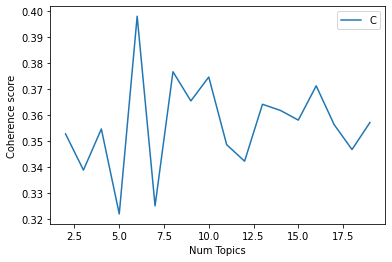

In [60]:
# Coherence values of all dataset

model_list, coherence_values = compute_coherence_values(dictionary=id2word_alldata, corpus=alldatalda_corpus, texts=texts_alldata, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (all data)"), loc='best')
plt.show()

In [61]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3528
LDA model with nº Topics = 3 has a Coherence value of 0.3389
LDA model with nº Topics = 4 has a Coherence value of 0.3547
LDA model with nº Topics = 5 has a Coherence value of 0.3221
LDA model with nº Topics = 6 has a Coherence value of 0.398
LDA model with nº Topics = 7 has a Coherence value of 0.3252
LDA model with nº Topics = 8 has a Coherence value of 0.3766
LDA model with nº Topics = 9 has a Coherence value of 0.3655
LDA model with nº Topics = 10 has a Coherence value of 0.3746
LDA model with nº Topics = 11 has a Coherence value of 0.3487
LDA model with nº Topics = 12 has a Coherence value of 0.3423
LDA model with nº Topics = 13 has a Coherence value of 0.3642
LDA model with nº Topics = 14 has a Coherence value of 0.3618
LDA model with nº Topics = 15 has a Coherence value of 0.3581
LDA model with nº Topics = 16 has a Coherence value of 0.3712
LDA model with nº Topics = 17 has a Coherence value of 0.3564
LDA model with nº

    - LDA model adjusted

Finally, I will create a model adjusted to the most appropriate number of topics as reflected in the hyperparameter model (with 6 number of topics in this case, with a Coherence Value of 0.398):

In [64]:
# number of topics
num_topics = 6

# Building LDA model
lda_modeladjusted_alldata = gensim.models.LdaMulticore(corpus=alldatalda_corpus,
                                       id2word=id2word_alldata,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_alldata.print_topics())
doc_ldaadjusted_alldata = lda_modeladjusted_alldata[alldatalda_corpus]

[(0,
  '0.047*"hours" + 0.030*"long" + 0.024*"working" + 0.017*"work" + '
  '0.011*"sometimes" + 0.008*"lot" + 0.008*"pay" + 0.008*"project" + '
  '0.008*"company" + 0.007*"day"'),
 (1,
  '0.062*"salary" + 0.047*"work" + 0.027*"lack" + 0.026*"low" + '
  '0.023*"environment" + 0.020*"opportunities" + 0.020*"career" + '
  '0.017*"people" + 0.014*"benefits" + 0.013*"projects"'),
 (2,
  '0.023*"poor" + 0.023*"big" + 0.022*"company" + 0.021*"slow" + '
  '0.017*"management" + 0.017*"difficult" + 0.015*"low" + 0.013*"bureaucracy" '
  '+ 0.013*"projects" + 0.011*"work"'),
 (3,
  '0.018*"management" + 0.017*"company" + 0.013*"processes" + '
  '0.009*"positions" + 0.009*"high" + 0.008*"difficult" + 0.008*"people" + '
  '0.008*"telefonica" + 0.007*"big" + 0.007*"global"'),
 (4,
  '0.022*"work" + 0.015*"job" + 0.013*"managers" + 0.012*"lot" + '
  '0.010*"project" + 0.009*"experience" + 0.009*"working" + 0.009*"management" '
  '+ 0.008*"without" + 0.007*"career"'),
 (5,
  '0.029*"company" + 0.026*"

    - Visualizing the LDA model

Let’s visualize the topics for interpretability, using a popular visualization package: `pyLDAvis` 

It is designed to help interactively with: 

1. Better understanding and interpreting individual topics (you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic).

2. Better understanding the relationships between the topics (exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics).

(*) more information in memory.

In [48]:
!pip install pyldavis

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 15.7 MB 3.0 MB/s            
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=483510e7caee2b5bccdda8cfcd3c500cece178508d82d02703111c85dab409b3
  Stored in directory: /home/dsc/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=4c4b1330f2f690d977ebc446785cd6bd02c6183550b8f564e068a0a438281710
  Stored in directory: /home/dsc/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [65]:
pyLDAvis.enable_notebook()
ldaadjustedviz_alldata = gensimvis.prepare(lda_modeladjusted_alldata, alldatalda_corpus, id2word_alldata)
ldaadjustedviz_alldata

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.032185 -0.004608       1        1  32.125245
1     -0.062830 -0.255455       2        1  21.943160
4     -0.113987  0.064055       3        1  13.263325
0     -0.131310  0.131110       4        1  12.549706
3      0.118583  0.058855       5        1  10.426801
2      0.221729  0.006042       6        1   9.691763, topic_info=          Term         Freq        Total Category  logprob  loglift
77      salary  1075.000000  1075.000000  Default  30.0000  30.0000
128      hours   490.000000   490.000000  Default  29.0000  29.0000
1324      lack   468.000000   468.000000  Default  28.0000  28.0000
257        low   583.000000   583.000000  Default  27.0000  27.0000
403       long   319.000000   319.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
859    process    33.552135    91.674429   Topic6  -5.4333   1.3288
28        work    83.651076  1609.276773   Topic6  -4.5198  -0.6230
10      career    45.355578   508.131670   Topic6  -5.1319  -0.0823
1770       due    33.244382   117.559331   Topic6  -5.4426   1.0708
571   internal    33.509621   143.125007   Topic6  -5.4346   0.8820

[423 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
327       1  0.164512  achieve
327       6  0.822559  achieve
5481      3  0.986785   agents
2099      2  0.962413    allow
88        1  0.652602     also
...     ...       ...      ...
3405      3  0.832924      yet
3405      5  0.151441      yet
3         1  0.278135    young
3         2  0.691123    young
3         6  0.025285    young

[738 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 1, 4, 3])

How can we interact with the visualization? 

Key observations?

(*) answers detailed in memory.

    - Saving object (model): serialization

In [17]:
import pickle

In [68]:
#lda_modeladjusted_alldata
#ldaadjustedviz_alldata

# write and create pickle object
pickle_out = open('ldamodel.alldata.pickle', 'wb') #the file is empty at the moment it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_alldata, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.alldata.pickle', 'rb')
pickle_ldaadjustedviz_alldata = pickle.load(pickle_in)

# show
print(lda_modeladjusted_alldata)

LdaModel(num_terms=8015, num_topics=6, decay=0.5, chunksize=1000)


### Topic modeling per company:

    A. IT consulting groups

#### **ACCENTURE**

In [93]:
# creating a dataframe only with the reviews about Accenture
df_accenture = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Accenture']
df_accenture = df_accenture.loc[:,['review']]
df_accenture.head()

review
0                               [environment, peers]
1                [environment, young, professionals]
2                   [access, big, projects, clients]
3  [field, consultancy, company, start, career, a...
4                          [exposure, lot, projects]

In [94]:
# how many reviews does the english dataset have about Accenture?
df_accenture.shape

(680, 1)

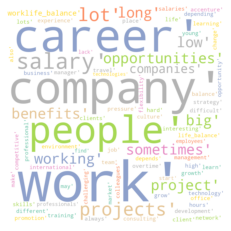

In [136]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
accenture_words = df_accenture.review
accenture_words_list = [word for line in accenture_words.astype(str) for word in line.split()]
accenture_wordcounts = Counter(accenture_words_list).most_common(100)

# creating a word counts dataframe
df_accenture_wordcounts = pd.DataFrame(accenture_wordcounts)
df_accenture_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
accenture_wordcounts_text = " ".join(word for word in df_accenture_wordcounts.word)

    ## create the wordcloud object
accenture_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(accenture_wordcounts_text)

    ## display the generated image
plt.imshow(accenture_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [101]:
#TOPIC MODELING

# accenture corpus
accenturelda = df_accenture.values.tolist()
accenturelda_words = list(sent_to_words(accenturelda))

# Create Dictionary
id2word_accenture = corpora.Dictionary(accenturelda_words)

# Create Corpus
texts_accenture = accenturelda_words

# Term Document Frequency
accenturelda_corpus = [id2word_accenture.doc2bow(text) for text in texts_accenture]

# number of topics
num_topics = 8

# Build LDA model
accenturelda_model = gensim.models.LdaMulticore(corpus=accenturelda_corpus,
                                       id2word=id2word_accenture,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(accenturelda_model.print_topics())
accenturelda_doc = accenturelda_model[accenturelda_corpus]

#Coherence Score 
coherence_accenturelda_model = CoherenceModel(model=accenturelda_model, texts=texts_accenture, dictionary=id2word_accenture, coherence='c_v')
coherence_accenturelda = coherence_accenturelda_model.get_coherence()
print('Coherence Score: ', coherence_accenturelda)

[(0,
  '0.050*"work" + 0.020*"projects" + 0.019*"people" + 0.019*"environment" + '
  '0.016*"company" + 0.013*"career" + 0.012*"life" + 0.011*"big" + '
  '0.010*"place" + 0.010*"benefits"'),
 (1,
  '0.037*"hours" + 0.029*"long" + 0.024*"projects" + 0.022*"company" + '
  '0.020*"work" + 0.014*"working" + 0.013*"career" + 0.008*"opportunities" + '
  '0.008*"environment" + 0.007*"companies"'),
 (2,
  '0.024*"career" + 0.016*"technology" + 0.012*"salary" + 0.011*"work" + '
  '0.011*"team" + 0.010*"high" + 0.010*"salaries" + 0.008*"opportunities" + '
  '0.008*"growth" + 0.007*"atmosphere"'),
 (3,
  '0.027*"work" + 0.025*"working" + 0.019*"people" + 0.016*"salary" + '
  '0.014*"lot" + 0.013*"hours" + 0.010*"company" + 0.010*"culture" + '
  '0.009*"team" + 0.009*"project"'),
 (4,
  '0.024*"projects" + 0.023*"learn" + 0.021*"lot" + 0.019*"clients" + '
  '0.018*"people" + 0.017*"opportunities" + 0.014*"different" + 0.014*"salary" '
  '+ 0.013*"work" + 0.012*"project"'),
 (5,
  '0.034*"project" 

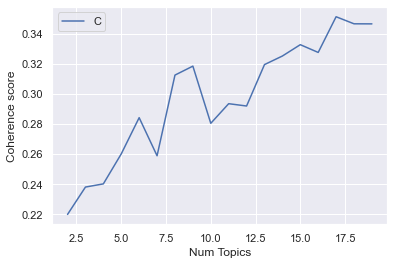

In [103]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_accenture, corpus=accenturelda_corpus, texts=texts_accenture, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Accenture)"), loc='best')
plt.show()

In [104]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.2199
LDA model with nº Topics = 3 has a Coherence value of 0.2381
LDA model with nº Topics = 4 has a Coherence value of 0.2402
LDA model with nº Topics = 5 has a Coherence value of 0.2602
LDA model with nº Topics = 6 has a Coherence value of 0.2842
LDA model with nº Topics = 7 has a Coherence value of 0.2589
LDA model with nº Topics = 8 has a Coherence value of 0.3126
LDA model with nº Topics = 9 has a Coherence value of 0.3185
LDA model with nº Topics = 10 has a Coherence value of 0.2805
LDA model with nº Topics = 11 has a Coherence value of 0.2935
LDA model with nº Topics = 12 has a Coherence value of 0.292
LDA model with nº Topics = 13 has a Coherence value of 0.3196
LDA model with nº Topics = 14 has a Coherence value of 0.3253
LDA model with nº Topics = 15 has a Coherence value of 0.3328
LDA model with nº Topics = 16 has a Coherence value of 0.3276
LDA model with nº Topics = 17 has a Coherence value of 0.3514
LDA model with nº

In [107]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 17

# Building LDA model
lda_modeladjusted_accenture = gensim.models.LdaMulticore(corpus=accenturelda_corpus,
                                       id2word=id2word_accenture,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_accenture.print_topics())
doc_ldaadjusted_accenture = lda_modeladjusted_accenture[accenturelda_corpus]

[(0,
  '0.046*"work" + 0.018*"team" + 0.016*"learning" + 0.014*"place" + '
  '0.013*"projects" + 0.012*"life_balance" + 0.010*"company" + '
  '0.009*"opportunities" + 0.009*"people" + 0.009*"career"'),
 (1,
  '0.030*"projects" + 0.025*"work" + 0.018*"career" + 0.016*"environment" + '
  '0.015*"hours" + 0.014*"company" + 0.014*"benefits" + 0.013*"salary" + '
  '0.012*"travel" + 0.012*"sometimes"'),
 (2,
  '0.018*"salary" + 0.017*"opportunities" + 0.014*"career" + 0.012*"people" + '
  '0.012*"make" + 0.011*"technology" + 0.011*"job" + 0.010*"project" + '
  '0.010*"training" + 0.009*"skills"'),
 (3,
  '0.032*"work" + 0.015*"people" + 0.014*"management" + 0.012*"team" + '
  '0.011*"project" + 0.010*"travel" + 0.010*"sometimes" + 0.009*"working" + '
  '0.009*"client" + 0.008*"salary"'),
 (4,
  '0.042*"lot" + 0.021*"projects" + 0.021*"learn" + 0.020*"clients" + '
  '0.019*"work" + 0.015*"people" + 0.014*"business" + 0.014*"career" + '
  '0.011*"big" + 0.011*"accenture"'),
 (5,
  '0.048*"proj

In [108]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_accenture = gensimvis.prepare(lda_modeladjusted_accenture, accenturelda_corpus, id2word_accenture)
ldaadjustedviz_accenture

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.011063  0.137675       1        1  11.002321
1      0.095520  0.029284       2        1   8.391210
9      0.089274  0.020675       3        1   7.779410
5     -0.018435  0.059702       4        1   6.687257
8     -0.058322  0.096502       5        1   6.412009
13     0.027628 -0.012368       6        1   6.322267
15     0.102029 -0.098087       7        1   6.011401
3      0.024490 -0.073017       8        1   5.939020
2     -0.035561  0.078023       9        1   5.912031
12    -0.009676  0.010180      10        1   5.042488
7      0.068063  0.007295      11        1   4.991009
14    -0.067011 -0.128617      12        1   4.805534
11    -0.024829 -0.023996      13        1   4.785526
0     -0.024812 -0.025754      14        1   4.405824
6     -0.180591 -0.029005      15        1   4.335894
16     0.005429 -0.022824      16        1   3.744835
10    -0.004258 -0.025669      17        1   3.431964, topic_info=         Term       Freq      Total Category  logprob  loglift
127     hours  52.000000  52.000000  Default  30.0000  30.0000
398      long  31.000000  31.000000  Default  29.0000  29.0000
111   project  41.000000  41.000000  Default  28.0000  28.0000
18        lot  53.000000  53.000000  Default  27.0000  27.0000
76     salary  57.000000  57.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
5         big   1.422461  34.696630  Topic17  -4.8503   0.1778
10     career   1.468787  55.631262  Topic17  -4.8182  -0.2623
76     salary   1.445263  57.210684  Topic17  -4.8344  -0.3064
18        lot   1.422459  53.899494  Topic17  -4.8503  -0.2627
7    projects   1.422461  68.367775  Topic17  -4.8503  -0.5005

[1110 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1543      3  0.651379  abandoned
1334     17  0.691982     absurd
213       1  0.350378  accenture
213       2  0.058396  accenture
213       3  0.058396  accenture
...     ...       ...        ...
3         8  0.132882      young
3        10  0.132882      young
3        12  0.132882      young
3        16  0.132882      young
1125     11  0.670515        yrs

[1882 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 10, 6, 9, 14, 16, 4, 3, 13, 8, 15, 12, 1, 7, 17, 11])

In [109]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.accenture.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_accenture, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.accenture.pickle', 'rb')
pickle_lda_modeladjusted_accenture = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_accenture)

LdaModel(num_terms=1645, num_topics=17, decay=0.5, chunksize=1000)


#### **INDRA / MINSAIT**

Minsait is a company belonging to the Indra group, so I am going to create a dataset in which I will unify the reviews of both.

In [110]:
# how many reviews does the english dataset have about Indra?
mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Indra'].shape

(388, 2)

In [111]:
# how many reviews does the english dataset have about Minsait?
mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Minsait'].shape

(66, 2)

In [112]:
# unifying the reviews of indra and minsait in the same dataframe

df_indra = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Indra']
df_minsait = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Minsait']
df_indra = df_indra.append(df_minsait)
df_indra = df_indra.loc[:,['review']]
df_indra.head()

review
1095  [people, work, interesting, international, pro...
1096                    [allowed, adaptable, timetable]
1097                      [work, high, level, projects]
1098                      [place, learn, multinational]
1099  [professionals, work, environment, engaging, p...

In [113]:
# how many reviews the english dataset have about all the Indra Group?
df_indra.shape

(454, 1)

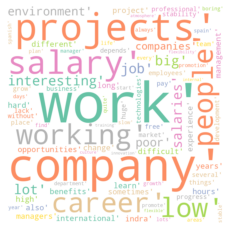

In [118]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
indra_words = df_indra.review
indra_words_list = [word for line in indra_words.astype(str) for word in line.split()]
indra_wordcounts = Counter(indra_words_list).most_common(100)

# creating a word counts dataframe
df_indra_wordcounts = pd.DataFrame(indra_wordcounts)
df_indra_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
indra_wordcounts_text = " ".join(word for word in df_indra_wordcounts.word)

    ## create the wordcloud object
indra_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(indra_wordcounts_text)

    ## display the generated image
plt.imshow(indra_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [127]:
#TOPIC MODELING

# accenture corpus
indralda = df_indra.values.tolist()
indralda_words = list(sent_to_words(indralda))

# remove stop words
indralda_words = remove_stopwords(indralda_words)

# Create Dictionary
id2word_indra = corpora.Dictionary(indralda_words)

# Create Corpus
texts_indra = indralda_words

# Term Document Frequency
indralda_corpus = [id2word_indra.doc2bow(text) for text in texts_indra]

# number of topics
num_topics = 8

# Build LDA model
indralda_model = gensim.models.LdaMulticore(corpus=indralda_corpus,
                                       id2word=id2word_indra,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(indralda_model.print_topics())
indralda_doc = indralda_model[indralda_corpus]

#Coherence Score 
coherence_indralda_model = CoherenceModel(model=indralda_model, texts=texts_indra, dictionary=id2word_indra, coherence='c_v')
coherence_indralda = coherence_indralda_model.get_coherence()
print('Coherence Score: ', coherence_indralda)

[(0,
  '0.019*"work" + 0.016*"management" + 0.013*"poor" + 0.012*"projects" + '
  '0.010*"environment" + 0.010*"career" + 0.010*"tech" + 0.010*"life_balance" '
  '+ 0.010*"stability" + 0.007*"company"'),
 (1,
  '0.029*"work" + 0.025*"company" + 0.021*"salary" + 0.016*"managers" + '
  '0.013*"benefits" + 0.012*"technologies" + 0.010*"low" + 0.009*"lot" + '
  '0.009*"indra" + 0.009*"learn"'),
 (2,
  '0.022*"working" + 0.019*"company" + 0.016*"projects" + 0.012*"hours" + '
  '0.012*"work" + 0.011*"long" + 0.011*"sometimes" + 0.010*"environment" + '
  '0.009*"lack" + 0.009*"security"'),
 (3,
  '0.036*"people" + 0.023*"work" + 0.018*"company" + 0.017*"working" + '
  '0.016*"salary" + 0.013*"learn" + 0.012*"low" + 0.009*"companies" + '
  '0.008*"projects" + 0.007*"experience"'),
 (4,
  '0.033*"work" + 0.027*"projects" + 0.023*"company" + 0.017*"salary" + '
  '0.014*"low" + 0.013*"project" + 0.011*"lot" + 0.010*"salaries" + '
  '0.009*"hours" + 0.009*"career"'),
 (5,
  '0.029*"career" + 0.025

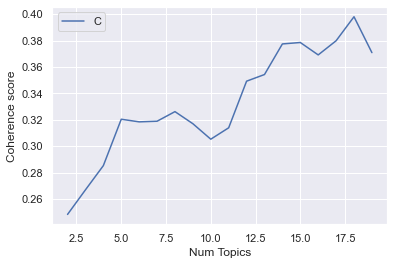

In [128]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_indra, corpus=indralda_corpus, texts=texts_indra, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Indra)"), loc='best')
plt.show()


In [129]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.2483
LDA model with nº Topics = 3 has a Coherence value of 0.2669
LDA model with nº Topics = 4 has a Coherence value of 0.2852
LDA model with nº Topics = 5 has a Coherence value of 0.3204
LDA model with nº Topics = 6 has a Coherence value of 0.3184
LDA model with nº Topics = 7 has a Coherence value of 0.3189
LDA model with nº Topics = 8 has a Coherence value of 0.3261
LDA model with nº Topics = 9 has a Coherence value of 0.317
LDA model with nº Topics = 10 has a Coherence value of 0.3052
LDA model with nº Topics = 11 has a Coherence value of 0.3139
LDA model with nº Topics = 12 has a Coherence value of 0.3492
LDA model with nº Topics = 13 has a Coherence value of 0.3542
LDA model with nº Topics = 14 has a Coherence value of 0.3774
LDA model with nº Topics = 15 has a Coherence value of 0.3785
LDA model with nº Topics = 16 has a Coherence value of 0.3691
LDA model with nº Topics = 17 has a Coherence value of 0.3798
LDA model with nº

In [125]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 18

# Building LDA model
lda_modeladjusted_indra = gensim.models.LdaMulticore(corpus=indralda_corpus,
                                       id2word=id2word_indra,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_indra.print_topics())
doc_ldaadjusted_indra = lda_modeladjusted_indra[indralda_corpus]

[(0,
  '0.023*"flexible" + 0.016*"sector" + 0.016*"stability" + 0.016*"software" + '
  '0.016*"still" + 0.010*"place" + 0.008*"life_balance" + 0.008*"conservative" '
  '+ 0.008*"forward" + 0.008*"move"'),
 (1,
  '0.030*"job" + 0.024*"different" + 0.020*"projects" + 0.020*"stable" + '
  '0.016*"work" + 0.016*"opportunities" + 0.016*"indra" + 0.014*"company" + '
  '0.012*"huge" + 0.012*"interesting"'),
 (2,
  '0.043*"working" + 0.029*"hours" + 0.018*"company" + 0.013*"coworkers" + '
  '0.011*"projects" + 0.011*"people" + 0.011*"work" + 0.011*"lack" + '
  '0.011*"lot" + 0.011*"atmosphere"'),
 (3,
  '0.042*"people" + 0.024*"salary" + 0.019*"low" + 0.018*"company" + '
  '0.017*"working" + 0.016*"work" + 0.015*"environment" + 0.014*"technology" + '
  '0.011*"projects" + 0.011*"huge"'),
 (4,
  '0.036*"work" + 0.024*"career" + 0.022*"low" + 0.020*"projects" + '
  '0.020*"hours" + 0.019*"salary" + 0.016*"salaries" + 0.016*"slow" + '
  '0.016*"long" + 0.014*"promotion"'),
 (5,
  '0.032*"career" 

In [126]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_indra = gensimvis.prepare(lda_modeladjusted_indra, indralda_corpus, id2word_indra)
ldaadjustedviz_indra

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.038252  0.008397       1        1  11.251785
10     0.168284  0.042132       2        1  10.055327
7      0.118355 -0.028655       3        1   7.263728
11     0.035009  0.009178       4        1   7.214970
9      0.007723 -0.114341       5        1   7.213884
15    -0.021110  0.102874       6        1   5.874598
2     -0.024623  0.137283       7        1   5.673499
14    -0.005023  0.006248       8        1   5.668254
3      0.060937  0.044858       9        1   5.622340
1      0.075654  0.018270      10        1   5.018264
8      0.012066 -0.103245      11        1   4.933436
6      0.005218 -0.055078      12        1   4.719360
5     -0.052163 -0.060015      13        1   4.263433
12    -0.026057 -0.059107      14        1   3.993049
17    -0.071941 -0.013293      15        1   3.440204
16    -0.114208 -0.016689      16        1   3.315804
13    -0.082760  0.050050      17        1   2.522592
0     -0.123614  0.031132      18        1   1.955473, topic_info=        Term       Freq      Total Category  logprob  loglift
81       big  31.000000  31.000000  Default  30.0000  30.0000
30   company  78.000000  78.000000  Default  29.0000  29.0000
2     people  37.000000  37.000000  Default  28.0000  28.0000
10     learn  20.000000  20.000000  Default  27.0000  27.0000
97    career  32.000000  32.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
8       high   0.579371  12.133564  Topic18  -4.8162   0.8928
120     full   0.579371   4.275957  Topic18  -4.8162   1.9357
302     year   0.579371   6.009004  Topic18  -4.8162   1.5955
229      say   0.579371   4.068788  Topic18  -4.8162   1.9854
72      else   0.579370   2.895884  Topic18  -4.8162   2.3254

[1045 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
482       3  0.665189        able
482       9  0.332594        able
1148      1  0.647116      abroad
463      15  0.712877  acceptable
551       7  0.677304   accepting
...     ...       ...         ...
181      11  0.170219       young
181      12  0.170219       young
181      14  0.170219       young
937      10  0.684115       youve
919       8  0.678698        zero

[1601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 11, 8, 12, 10, 16, 3, 15, 4, 2, 9, 7, 6, 13, 18, 17, 14, 1])

In [130]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.indra.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_indra, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.indra.pickle', 'rb')
pickle_lda_modeladjusted_indra = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_indra)

LdaModel(num_terms=1234, num_topics=18, decay=0.5, chunksize=1000)


#### **EVERIS**

In [132]:
# creating a dataframe only with the reviews about Everis
df_everis = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Everis']
df_everis = df_everis.loc[:,['review']]
df_everis.head()

review
597  [consulting, experience, general, tend, open, ...
598  [work, opportunities, depending, business, uni...
599  [lots, different, learning, opportunities, div...
600                                      [say, honest]
601  [people, work, environment, easily, make, frie...

In [133]:
# how many reviews the english dataset have about Everis?
df_everis.shape

(374, 1)

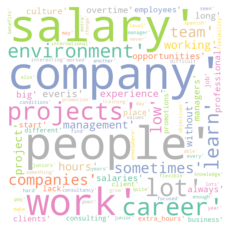

In [137]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
everis_words = df_everis.review
everis_words_list = [word for line in everis_words.astype(str) for word in line.split()]
everis_wordcounts = Counter(everis_words_list).most_common(100)

# creating a word counts dataframe
df_everis_wordcounts = pd.DataFrame(everis_wordcounts)
df_everis_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
everis_wordcounts_text = " ".join(word for word in df_everis_wordcounts.word)

    ## create the wordcloud object
everis_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(everis_wordcounts_text)

    ## display the generated image
plt.imshow(everis_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [138]:
#TOPIC MODELING

# accenture corpus
everislda = df_everis.values.tolist()
everislda_words = list(sent_to_words(everislda))

# remove stop words
everislda_words = remove_stopwords(everislda_words)

# Create Dictionary
id2word_everis = corpora.Dictionary(everislda_words)

# Create Corpus
texts_everis = everislda_words

# Term Document Frequency
everislda_corpus = [id2word_indra.doc2bow(text) for text in texts_everis]

# number of topics
num_topics = 10

# Build LDA model
everislda_model = gensim.models.LdaMulticore(corpus=everislda_corpus,
                                       id2word=id2word_everis,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(everislda_model.print_topics())
everislda_doc = everislda_model[everislda_corpus]

#Coherence Score 
coherence_everislda_model = CoherenceModel(model=everislda_model, texts=texts_everis, dictionary=id2word_everis, coherence='c_v')
coherence_everislda = coherence_everislda_model.get_coherence()
print('Coherence Score: ', coherence_everislda)

[(0,
  '0.020*"doors" + 0.019*"takes" + 0.018*"populated" + 0.018*"experience" + '
  '0.018*"attentive" + 0.013*"general" + 0.011*"strong" + 0.011*"plan" + '
  '0.011*"building" + 0.009*"depending"'),
 (1,
  '0.037*"doors" + 0.033*"dynamic" + 0.025*"general" + 0.023*"experience" + '
  '0.023*"make" + 0.020*"valuable" + 0.020*"thats" + 0.017*"ambiance" + '
  '0.016*"interested" + 0.015*"opportunities"'),
 (2,
  '0.057*"general" + 0.036*"dynamic" + 0.028*"ambiance" + 0.026*"takes" + '
  '0.021*"strong" + 0.016*"experience" + 0.015*"plan" + 0.014*"progression" + '
  '0.013*"fancy" + 0.010*"internal"'),
 (3,
  '0.080*"valuable" + 0.050*"beginning" + 0.038*"enough" + 0.020*"thats" + '
  '0.018*"progress" + 0.016*"takes" + 0.016*"general" + 0.015*"frustration" + '
  '0.012*"wont" + 0.012*"start"'),
 (4,
  '0.029*"clients" + 0.026*"valuable" + 0.020*"ambiance" + 0.014*"develop" + '
  '0.014*"dynamic" + 0.013*"doors" + 0.012*"without" + 0.012*"partly" + '
  '0.012*"tech" + 0.011*"progress"'),


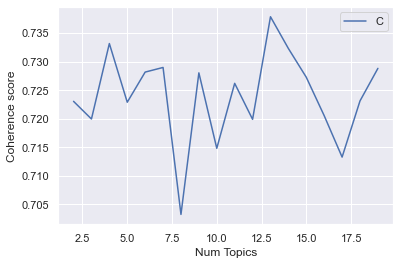

In [146]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_everis, corpus=everislda_corpus, texts=texts_everis, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Everis)"), loc='best')
plt.show()


In [147]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.723
LDA model with nº Topics = 3 has a Coherence value of 0.7199
LDA model with nº Topics = 4 has a Coherence value of 0.7332
LDA model with nº Topics = 5 has a Coherence value of 0.7229
LDA model with nº Topics = 6 has a Coherence value of 0.7282
LDA model with nº Topics = 7 has a Coherence value of 0.729
LDA model with nº Topics = 8 has a Coherence value of 0.7032
LDA model with nº Topics = 9 has a Coherence value of 0.728
LDA model with nº Topics = 10 has a Coherence value of 0.7148
LDA model with nº Topics = 11 has a Coherence value of 0.7262
LDA model with nº Topics = 12 has a Coherence value of 0.7199
LDA model with nº Topics = 13 has a Coherence value of 0.7379
LDA model with nº Topics = 14 has a Coherence value of 0.7323
LDA model with nº Topics = 15 has a Coherence value of 0.7273
LDA model with nº Topics = 16 has a Coherence value of 0.7205
LDA model with nº Topics = 17 has a Coherence value of 0.7133
LDA model with nº T

In [148]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 13

# Building LDA model
lda_modeladjusted_everis = gensim.models.LdaMulticore(corpus=everislda_corpus,
                                       id2word=id2word_everis,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_everis.print_topics())
doc_ldaadjusted_everis = lda_modeladjusted_everis[everislda_corpus]

[(0,
  '0.025*"dynamic" + 0.022*"doors" + 0.022*"depending" + 0.017*"general" + '
  '0.013*"strong" + 0.012*"progression" + 0.012*"desired" + '
  '0.010*"opportunities" + 0.008*"experience" + 0.008*"company"'),
 (1,
  '0.033*"general" + 0.027*"experience" + 0.024*"ambiance" + 0.017*"dynamic" + '
  '0.014*"clients" + 0.014*"takes" + 0.011*"opportunities" + 0.010*"fully" + '
  '0.009*"doors" + 0.009*"hours"'),
 (2,
  '0.055*"general" + 0.039*"dynamic" + 0.030*"strong" + 0.030*"takes" + '
  '0.018*"plan" + 0.015*"experience" + 0.012*"progression" + '
  '0.012*"partnerships" + 0.012*"directors" + 0.010*"poor"'),
 (3,
  '0.099*"valuable" + 0.057*"beginning" + 0.033*"ambiance" + 0.029*"progress" '
  '+ 0.021*"takes" + 0.016*"enough" + 0.015*"clients" + 0.014*"general" + '
  '0.012*"experience" + 0.011*"thats"'),
 (4,
  '0.025*"clients" + 0.017*"valuable" + 0.016*"dynamic" + 0.016*"without" + '
  '0.016*"experience" + 0.013*"takes" + 0.013*"qualifications" + '
  '0.013*"favour" + 0.013*"devel

In [149]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_everis = gensimvis.prepare(lda_modeladjusted_everis, everislda_corpus, id2word_everis)
ldaadjustedviz_everis

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.076988 -0.134751       1        1  14.491223
12    -0.058961 -0.087780       2        1  13.751911
6      0.046974 -0.002436       3        1   9.639495
3      0.157952 -0.045466       4        1   8.987921
4      0.087642 -0.013626       5        1   7.738832
5     -0.035810  0.004178       6        1   7.534324
10     0.025812  0.012275       7        1   6.502571
9     -0.003349  0.001314       8        1   6.274719
7     -0.022174  0.105723       9        1   5.721038
0     -0.053403  0.044777      10        1   5.253986
8      0.003728  0.047959      11        1   4.933242
11    -0.038749  0.073995      12        1   4.645833
1     -0.032673 -0.006160      13        1   4.524905, topic_info=           Term       Freq      Total Category  logprob  loglift
69     valuable  40.000000  40.000000  Default  30.0000  30.0000
183   beginning  23.000000  23.000000  Default  29.0000  29.0000
30      dynamic  52.000000  52.000000  Default  28.0000  28.0000
97          may  24.000000  24.000000  Default  27.0000  27.0000
4       general  76.000000  76.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
8    atmosphere   0.586493   4.042466  Topic13  -5.3446   1.1651
59      develop   0.586487   4.597347  Topic13  -5.3446   1.0365
44         kind   0.586484   5.253713  Topic13  -5.3446   0.9030
47   department   0.586484   3.867721  Topic13  -5.3446   1.2093
482      either   0.586483   5.183611  Topic13  -5.3446   0.9165

[742 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
93        3  0.552350     able
93        7  0.110470     able
93        9  0.110470     able
93       10  0.110470     able
93       11  0.110470     able
...     ...       ...      ...
636       1  0.375219     wull
636       7  0.375219     wull
670       4  0.394396    years
670       8  0.394396    years
991      10  0.828110  younger

[1182 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 13, 7, 4, 5, 6, 11, 10, 8, 1, 9, 12, 2])

In [151]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.everis.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_everis, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.everis.pickle', 'rb')
pickle_lda_modeladjusted_everis = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_everis)

LdaModel(num_terms=1423, num_topics=13, decay=0.5, chunksize=1000)


#### **IBM**

In [152]:
# creating a dataframe only with the reviews about IBM
df_ibm = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'IBM']
df_ibm = df_ibm.loc[:,['review']]
df_ibm.head()

review
1083  [flexible, work, teammates, learning, experience]
1084  [technology, companies, invests, scientific, r...
1085  [innovation, inclusive, endless, learning, col...
1086  [continuous_improvement, action, plans, manage...
1087  [amazing, workplace, encourage, work, productive]

In [153]:
# how many reviews the english dataset have about IBM?
df_ibm.shape

(276, 1)

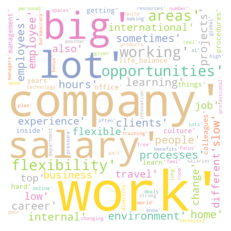

In [154]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
ibm_words = df_ibm.review
ibm_words_list = [word for line in ibm_words.astype(str) for word in line.split()]
ibm_wordcounts = Counter(ibm_words_list).most_common(100)

# creating a word counts dataframe
df_ibm_wordcounts = pd.DataFrame(ibm_wordcounts)
df_ibm_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
ibm_wordcounts_text = " ".join(word for word in df_ibm_wordcounts.word)

    ## create the wordcloud object
ibm_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(ibm_wordcounts_text)

    ## display the generated image
plt.imshow(ibm_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [155]:
#TOPIC MODELING

# accenture corpus
ibmlda = df_ibm.values.tolist()
ibmlda_words = list(sent_to_words(ibmlda))

# remove stop words
ibmlda_words = remove_stopwords(ibmlda_words)

# Create Dictionary
id2word_ibm = corpora.Dictionary(ibmlda_words)

# Create Corpus
texts_ibm = ibmlda_words

# Term Document Frequency
ibmlda_corpus = [id2word_ibm.doc2bow(text) for text in texts_ibm]

# number of topics
num_topics = 10

# Build LDA model
ibmlda_model = gensim.models.LdaMulticore(corpus=ibmlda_corpus,
                                       id2word=id2word_ibm,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(ibmlda_model.print_topics())
ibmlda_doc = ibmlda_model[ibmlda_corpus]

#Coherence Score 
coherence_ibmlda_model = CoherenceModel(model=ibmlda_model, texts=texts_ibm, dictionary=id2word_ibm, coherence='c_v')
coherence_ibmlda = coherence_ibmlda_model.get_coherence()
print('Coherence Score: ', coherence_ibmlda)

[(0,
  '0.037*"company" + 0.019*"work" + 0.013*"processes" + 0.013*"slow" + '
  '0.011*"lot" + 0.011*"employees" + 0.011*"colleagues" + 0.011*"online" + '
  '0.011*"hard" + 0.008*"promotion"'),
 (1,
  '0.024*"top" + 0.018*"lot" + 0.015*"big" + 0.012*"travel" + '
  '0.012*"management" + 0.012*"deals" + 0.012*"bonus" + 0.012*"mega" + '
  '0.012*"people" + 0.009*"sometimes"'),
 (2,
  '0.030*"work" + 0.022*"atmosphere" + 0.018*"areas" + 0.013*"company" + '
  '0.013*"technology" + 0.013*"technical" + 0.013*"complex" + '
  '0.013*"processes" + 0.013*"tech" + 0.013*"employees"'),
 (3,
  '0.033*"work" + 0.018*"learning" + 0.018*"lot" + 0.018*"working" + '
  '0.015*"different" + 0.012*"flexible" + 0.012*"experience" + '
  '0.012*"environment" + 0.011*"opportunities" + 0.009*"lots"'),
 (4,
  '0.054*"work" + 0.018*"people" + 0.015*"home" + 0.012*"life_balance" + '
  '0.010*"lot" + 0.010*"personal" + 0.008*"possibilities" + 0.008*"policy" + '
  '0.008*"totally" + 0.008*"part"'),
 (5,
  '0.015*"int

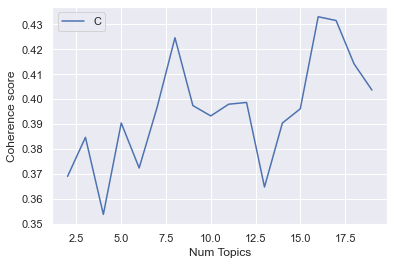

In [156]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_ibm, corpus=ibmlda_corpus, texts=texts_ibm, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (IBM)"), loc='best')
plt.show()


In [157]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3691
LDA model with nº Topics = 3 has a Coherence value of 0.3847
LDA model with nº Topics = 4 has a Coherence value of 0.3538
LDA model with nº Topics = 5 has a Coherence value of 0.3905
LDA model with nº Topics = 6 has a Coherence value of 0.3724
LDA model with nº Topics = 7 has a Coherence value of 0.3967
LDA model with nº Topics = 8 has a Coherence value of 0.4246
LDA model with nº Topics = 9 has a Coherence value of 0.3974
LDA model with nº Topics = 10 has a Coherence value of 0.3933
LDA model with nº Topics = 11 has a Coherence value of 0.398
LDA model with nº Topics = 12 has a Coherence value of 0.3987
LDA model with nº Topics = 13 has a Coherence value of 0.3648
LDA model with nº Topics = 14 has a Coherence value of 0.3904
LDA model with nº Topics = 15 has a Coherence value of 0.3961
LDA model with nº Topics = 16 has a Coherence value of 0.433
LDA model with nº Topics = 17 has a Coherence value of 0.4315
LDA model with nº 

In [160]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 16

# Building LDA model
lda_modeladjusted_ibm = gensim.models.LdaMulticore(corpus=ibmlda_corpus,
                                       id2word=id2word_ibm,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_ibm.print_topics())
doc_ldaadjusted_ibm = lda_modeladjusted_ibm[ibmlda_corpus]

[(0,
  '0.043*"slow" + 0.040*"company" + 0.025*"procedures" + 0.022*"internal" + '
  '0.021*"processes" + 0.013*"work" + 0.013*"promotion" + 0.013*"move" + '
  '0.013*"growth" + 0.013*"nightmare"'),
 (1,
  '0.028*"work" + 0.027*"company" + 0.017*"top" + 0.017*"big" + '
  '0.014*"working" + 0.014*"hard" + 0.011*"people" + 0.011*"contractors" + '
  '0.011*"opportunities" + 0.011*"bonus"'),
 (2,
  '0.036*"work" + 0.032*"company" + 0.025*"big" + 0.024*"atmosphere" + '
  '0.018*"department" + 0.018*"flexibility" + 0.018*"another" + 0.015*"ai" + '
  '0.015*"clients" + 0.015*"watson"'),
 (3,
  '0.029*"opportunities" + 0.023*"work" + 0.023*"role" + 0.018*"environment" + '
  '0.018*"quite" + 0.012*"lots" + 0.012*"big" + 0.012*"career" + 0.012*"given" '
  '+ 0.012*"track"'),
 (4,
  '0.071*"work" + 0.032*"home" + 0.020*"flexibility" + 0.019*"people" + '
  '0.013*"possibilities" + 0.013*"environment" + 0.013*"life_balance" + '
  '0.010*"personal" + 0.010*"totally" + 0.010*"inside"'),
 (5,
  '0.038

In [161]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_ibm = gensimvis.prepare(lda_modeladjusted_ibm, ibmlda_corpus, id2word_ibm)
ldaadjustedviz_ibm

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.199907  0.025557       1        1  12.593312
1     -0.138753 -0.049301       2        1  10.684352
8     -0.058808  0.147749       3        1  10.348492
4      0.060055 -0.016960       4        1   8.231194
14    -0.023872  0.106184       5        1   8.177675
2     -0.040540  0.142451       6        1   7.507653
13    -0.144914 -0.100084       7        1   6.778217
0      0.035519  0.001165       8        1   5.732739
12     0.038745 -0.024340       9        1   4.886024
7     -0.060133  0.024935      10        1   4.384104
15     0.023985  0.048698      11        1   4.100591
5      0.027342 -0.067550      12        1   3.957958
3      0.001768 -0.073737      13        1   3.830480
9      0.047933 -0.068369      14        1   3.649246
6      0.035174 -0.059017      15        1   2.780232
11    -0.003406 -0.037381      16        1   2.357731, topic_info=              Term       Freq      Total Category  logprob  loglift
4             work  55.000000  55.000000  Default  30.0000  30.0000
39            home  15.000000  15.000000  Default  29.0000  29.0000
2         learning  13.000000  13.000000  Default  28.0000  28.0000
115         salary  25.000000  25.000000  Default  27.0000  27.0000
628           slow  15.000000  15.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
119           high   0.565582   8.147011  Topic16  -4.7648   1.0799
22       technical   0.565582   5.552159  Topic16  -4.7648   1.4634
220  international   0.565582   8.507459  Topic16  -4.7648   1.0366
492          place   0.565582   7.450952  Topic16  -4.7648   1.1692
14        constant   0.565581   4.538550  Topic16  -4.7648   1.6650

[840 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
457       7  0.497156      abroad
457      12  0.248578      abroad
457      15  0.248578      abroad
789       1  0.850181  absolutely
249      15  0.545789     academy
...     ...       ...         ...
510       6  0.283939       young
510      13  0.283939       young
510      14  0.283939       young
417      15  0.790192    youthful
913       5  0.679216        zero

[1186 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 2, 9, 5, 15, 3, 14, 1, 13, 8, 16, 6, 4, 10, 7, 12])

In [162]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.ibm.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_ibm, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.ibm.pickle', 'rb')
pickle_lda_modeladjusted_ibm = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_ibm)

LdaModel(num_terms=1046, num_topics=16, decay=0.5, chunksize=1000)


    B. Business Consulting groups (big four)

Deloitte, PwC, KPMG

#### **DELOITTE**

In [29]:
# creating a dataframe only with the reviews about Deloitte
df_deloitte = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Deloitte']
df_deloitte = df_deloitte.loc[:,['review']]
df_deloitte.head()

review
402  [salary, compensation, reputation, recognition...
403    [big, reputation, projects, important, clients]
404  [learn, ms, excel, make, lifelong, friends, go...
405               [involved, lot, different, projects]
406  [learning_curve, team, culture, international,...

In [30]:
# how many reviews the english dataset have about Deloitte?
df_deloitte.shape

(380, 1)

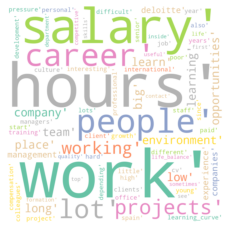

In [31]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
deloitte_words = df_deloitte.review
deloitte_words_list = [word for line in deloitte_words.astype(str) for word in line.split()]
deloitte_wordcounts = Counter(deloitte_words_list).most_common(100)

# creating a word counts dataframe
df_deloitte_wordcounts = pd.DataFrame(deloitte_wordcounts)
df_deloitte_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
deloitte_wordcounts_text = " ".join(word for word in df_deloitte_wordcounts.word)

    ## create the wordcloud object
deloitte_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(deloitte_wordcounts_text)

    ## display the generated image
plt.imshow(deloitte_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [32]:
#TOPIC MODELING

# accenture corpus
deloittelda = df_deloitte.values.tolist()
deloittelda_words = list(sent_to_words(deloittelda))

# remove stop words
deloittelda_words = remove_stopwords(deloittelda_words)

# Create Dictionary
id2word_deloitte = corpora.Dictionary(deloittelda_words)

# Create Corpus
texts_deloitte = deloittelda_words

# Term Document Frequency
deloittelda_corpus = [id2word_deloitte.doc2bow(text) for text in texts_deloitte]

# number of topics
num_topics = 10

# Build LDA model
deloittelda_model = gensim.models.LdaMulticore(corpus=deloittelda_corpus,
                                               id2word=id2word_deloitte,
                                               num_topics=num_topics,
                                               random_state=100,
                                               chunksize=1000,
                                               passes=10)

# Print the Keyword in the topics
pprint(deloittelda_model.print_topics())
deloittelda_doc = deloittelda_model[deloittelda_corpus]

#Coherence Score 
coherence_deloittelda_model = CoherenceModel(model=deloittelda_model, texts=texts_deloitte, dictionary=id2word_deloitte, coherence='c_v')
coherence_deloittelda = coherence_deloittelda_model.get_coherence()
print('Coherence Score: ', coherence_deloittelda)

[(0,
  '0.024*"work" + 0.015*"environment" + 0.011*"career" + 0.010*"projects" + '
  '0.010*"hours" + 0.010*"salary" + 0.010*"young" + 0.010*"big" + '
  '0.010*"inside" + 0.010*"schedule"'),
 (1,
  '0.078*"hours" + 0.068*"work" + 0.036*"long" + 0.031*"lot" + 0.016*"high" + '
  '0.016*"working" + 0.016*"life_balance" + 0.014*"salaries" + 0.013*"team" + '
  '0.011*"difficult"'),
 (2,
  '0.039*"work" + 0.028*"high" + 0.026*"projects" + 0.023*"hours" + '
  '0.022*"people" + 0.019*"pressure" + 0.019*"experience" + '
  '0.019*"learning_curve" + 0.017*"salary" + 0.014*"working"'),
 (3,
  '0.042*"lot" + 0.035*"salary" + 0.029*"learn" + 0.024*"working" + '
  '0.018*"low" + 0.015*"international" + 0.015*"deloitte" + 0.011*"people" + '
  '0.011*"compensation" + 0.011*"deals"'),
 (4,
  '0.033*"learn" + 0.029*"lot" + 0.021*"place" + 0.021*"environment" + '
  '0.019*"career" + 0.018*"start" + 0.016*"different" + 0.016*"managers" + '
  '0.013*"professional" + 0.013*"company"'),
 (5,
  '0.019*"long" +

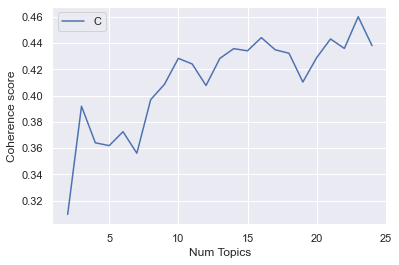

In [35]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_deloitte, corpus=deloittelda_corpus, texts=texts_deloitte, start=2, limit=25, step=1)

# Show graph
limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Deloitte)"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3095
LDA model with nº Topics = 3 has a Coherence value of 0.3919
LDA model with nº Topics = 4 has a Coherence value of 0.3641
LDA model with nº Topics = 5 has a Coherence value of 0.3619
LDA model with nº Topics = 6 has a Coherence value of 0.3725
LDA model with nº Topics = 7 has a Coherence value of 0.3561
LDA model with nº Topics = 8 has a Coherence value of 0.3969
LDA model with nº Topics = 9 has a Coherence value of 0.4087
LDA model with nº Topics = 10 has a Coherence value of 0.4284
LDA model with nº Topics = 11 has a Coherence value of 0.4241
LDA model with nº Topics = 12 has a Coherence value of 0.4077
LDA model with nº Topics = 13 has a Coherence value of 0.4284
LDA model with nº Topics = 14 has a Coherence value of 0.4358
LDA model with nº Topics = 15 has a Coherence value of 0.4342
LDA model with nº Topics = 16 has a Coherence value of 0.4442
LDA model with nº Topics = 17 has a Coherence value of 0.4349
LDA model with n

In [37]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 23

# Building LDA model
lda_modeladjusted_deloitte = gensim.models.LdaMulticore(corpus=deloittelda_corpus,
                                                        id2word=id2word_deloitte,
                                                        num_topics=num_topics,
                                                        random_state=100,
                                                        chunksize=1000,
                                                        passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_deloitte.print_topics())
doc_ldaadjusted_deloitte = lda_modeladjusted_deloitte[deloittelda_corpus]

[(11,
  '0.068*"projects" + 0.053*"work" + 0.050*"pressure" + 0.045*"salary" + '
  '0.044*"interesting" + 0.027*"low" + 0.024*"high" + 0.021*"hours" + '
  '0.018*"expected" + 0.018*"enough"'),
 (10,
  '0.087*"environment" + 0.058*"working" + 0.033*"people" + 0.018*"job" + '
  '0.018*"young" + 0.016*"hours" + 0.015*"projects" + 0.015*"learning" + '
  '0.014*"opportunities" + 0.012*"work"'),
 (3,
  '0.035*"salary" + 0.023*"benefits" + 0.023*"clients" + 0.023*"team" + '
  '0.012*"management" + 0.012*"schedule" + 0.012*"compensation" + '
  '0.012*"international" + 0.012*"food" + 0.012*"included"'),
 (14,
  '0.049*"office" + 0.033*"team" + 0.025*"less" + 0.017*"deloitte" + '
  '0.017*"management" + 0.017*"due" + 0.017*"since" + 0.017*"managers" + '
  '0.017*"support" + 0.016*"learning_curve"'),
 (6,
  '0.018*"people" + 0.018*"working" + 0.018*"quality" + 0.018*"hours" + '
  '0.018*"lack" + 0.015*"work" + 0.009*"team" + 0.009*"services" + '
  '0.009*"happy" + 0.009*"depends"'),
 (8,
  '0.036

In [38]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_deloitte = gensimvis.prepare(lda_modeladjusted_deloitte, deloittelda_corpus, id2word_deloitte)
ldaadjustedviz_deloitte

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.156106 -0.042902       1        1  9.876729
20     0.052767 -0.108757       2        1  7.372027
16     0.151952 -0.028755       3        1  6.716702
10    -0.008964 -0.122854       4        1  6.649572
21     0.127399  0.100701       5        1  6.153925
7      0.060412 -0.051279       6        1  5.848287
2     -0.052590 -0.092297       7        1  4.612918
18    -0.069083 -0.059310       8        1  4.573754
13    -0.020025  0.058458       9        1  4.365197
22     0.015226  0.039472      10        1  4.104369
4      0.025612  0.091720      11        1  3.775770
14    -0.150240  0.007556      12        1  3.696702
0     -0.030909  0.081985      13        1  3.608318
1      0.048410  0.014743      14        1  3.607112
8     -0.041700 -0.054639      15        1  3.215440
6     -0.021693 -0.012151      16        1  3.177859
5     -0.001572 -0.004064      17        1  3.109637
19    -0.086332 -0.059385      18        1  3.069792
11     0.098302  0.045621      19        1  3.018358
9     -0.075078  0.027176      20        1  2.984340
12    -0.082433  0.123761      21        1  2.813420
3     -0.062129  0.007272      22        1  2.242046
17    -0.033438  0.037928      23        1  1.407726, topic_info=             Term       Freq      Total Category  logprob  loglift
42          place  14.000000  14.000000  Default  30.0000  30.0000
61    environment  30.000000  30.000000  Default  29.0000  29.0000
57           work  68.000000  68.000000  Default  28.0000  28.0000
11       projects  31.000000  31.000000  Default  27.0000  27.0000
71        working  27.000000  27.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
117   interesting   0.026303   9.352275  Topic23  -7.1693  -1.6105
511         hours   0.028667  49.727919  Topic23  -7.0832  -3.1954
29            lot   0.027700  41.530427  Topic23  -7.1175  -3.0496
0    compensation   0.023335   4.309124  Topic23  -7.2890  -0.9553
1        contacts   0.023335   2.999618  Topic23  -7.2890  -0.5931

[1167 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
563      17  0.703899  abandonment
286      20  0.728864      ability
291       3  0.341407         able
291       8  0.341407         able
291      15  0.341407         able
...     ...       ...          ...
72        9  0.135544        young
72       10  0.135544        young
72       13  0.135544        young
72       15  0.135544        young
479       9  0.688745        youth

[1499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 21, 17, 11, 22, 8, 3, 19, 14, 23, 5, 15, 1, 2, 9, 7, 6, 20, 12, 10, 13, 4, 18])

In [39]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.deloitte.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_deloitte, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.deloitte.pickle', 'rb')
pickle_lda_modeladjusted_deloitte = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_deloitte)

LdaModel(num_terms=888, num_topics=23, decay=0.5, chunksize=1000)


### **PWC**

In [40]:
# creating a dataframe only with the reviews about PwC
df_pwc = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'PwC']
df_pwc = df_pwc.loc[:,['review']]
df_pwc.head()

review
1294  [learning, huge, training, support, mentors, p...
1295                               [colleagues, people]
1296  [big, clients, huge, projects, solid, career, ...
1297            [experience, quality, tools, endurance]
1298  [salary, open, doors, leave, work, companies, ...

In [41]:
# how many reviews the english dataset have about PwC?
df_pwc.shape

(230, 1)

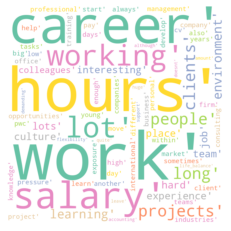

In [42]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
pwc_words = df_pwc.review
pwc_words_list = [word for line in pwc_words.astype(str) for word in line.split()]
pwc_wordcounts = Counter(pwc_words_list).most_common(100)

# creating a word counts dataframe
df_pwc_wordcounts = pd.DataFrame(pwc_wordcounts)
df_pwc_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
pwc_wordcounts_text = " ".join(word for word in df_pwc_wordcounts.word)

    ## create the wordcloud object
pwc_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(pwc_wordcounts_text)

    ## display the generated image
plt.imshow(pwc_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [43]:
#TOPIC MODELING

# accenture corpus
pwclda = df_pwc.values.tolist()
pwclda_words = list(sent_to_words(pwclda))

# remove stop words
pwclda_words = remove_stopwords(pwclda_words)

# Create Dictionary
id2word_pwc = corpora.Dictionary(pwclda_words)

# Create Corpus
texts_pwc = pwclda_words

# Term Document Frequency
pwclda_corpus = [id2word_pwc.doc2bow(text) for text in texts_pwc]

# number of topics
num_topics = 10

# Build LDA model
pwclda_model = gensim.models.LdaMulticore(corpus=pwclda_corpus,
                                          id2word=id2word_pwc,
                                          num_topics=num_topics,
                                          random_state=100,
                                          chunksize=1000,
                                          passes=10)

# Print the Keyword in the topics
pprint(pwclda_model.print_topics())
pwclda_doc = pwclda_model[pwclda_corpus]

#Coherence Score 
coherence_pwclda_model = CoherenceModel(model=pwclda_model, texts=texts_pwc, dictionary=id2word_pwc, coherence='c_v')
coherence_pwclda = coherence_pwclda_model.get_coherence()
print('Coherence Score: ', coherence_pwclda)

[(0,
  '0.042*"work" + 0.018*"lot" + 0.014*"learn" + 0.014*"company" + '
  '0.011*"projects" + 0.011*"poor" + 0.011*"culture" + 0.011*"working" + '
  '0.011*"start" + 0.011*"pwc"'),
 (1,
  '0.028*"work" + 0.013*"place" + 0.013*"difficult" + 0.013*"pwc" + '
  '0.013*"achieve" + 0.013*"understanding" + 0.013*"project" + 0.012*"lot" + '
  '0.011*"working" + 0.007*"teams"'),
 (2,
  '0.036*"hours" + 0.030*"working" + 0.028*"long" + 0.013*"big" + '
  '0.013*"company" + 0.013*"challenging" + 0.012*"people" + 0.009*"work" + '
  '0.009*"culture" + 0.009*"learn"'),
 (3,
  '0.054*"work" + 0.049*"salary" + 0.035*"hours" + 0.020*"long" + '
  '0.018*"career" + 0.015*"pressure" + 0.014*"life_balance" + 0.014*"hard" + '
  '0.011*"low" + 0.011*"lot"'),
 (4,
  '0.029*"career" + 0.029*"work" + 0.028*"learning" + 0.023*"job" + '
  '0.015*"knowledge" + 0.015*"day" + 0.015*"start" + 0.012*"working" + '
  '0.012*"team" + 0.012*"different"'),
 (5,
  '0.014*"management" + 0.014*"working" + 0.014*"work" + 0.014

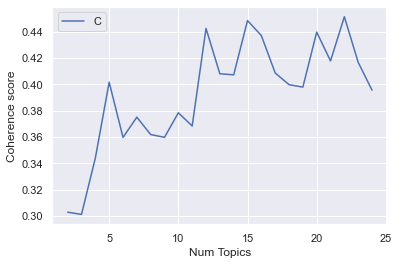

In [45]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_pwc, corpus=pwclda_corpus, texts=texts_pwc, start=2, limit=25, step=1)

# Show graph
limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (PwC)"), loc='best')
plt.show()

In [46]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.303
LDA model with nº Topics = 3 has a Coherence value of 0.3013
LDA model with nº Topics = 4 has a Coherence value of 0.344
LDA model with nº Topics = 5 has a Coherence value of 0.4016
LDA model with nº Topics = 6 has a Coherence value of 0.3597
LDA model with nº Topics = 7 has a Coherence value of 0.375
LDA model with nº Topics = 8 has a Coherence value of 0.3619
LDA model with nº Topics = 9 has a Coherence value of 0.3598
LDA model with nº Topics = 10 has a Coherence value of 0.3784
LDA model with nº Topics = 11 has a Coherence value of 0.3684
LDA model with nº Topics = 12 has a Coherence value of 0.4424
LDA model with nº Topics = 13 has a Coherence value of 0.408
LDA model with nº Topics = 14 has a Coherence value of 0.4072
LDA model with nº Topics = 15 has a Coherence value of 0.4483
LDA model with nº Topics = 16 has a Coherence value of 0.4369
LDA model with nº Topics = 17 has a Coherence value of 0.4086
LDA model with nº To

In [47]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 22

# Building LDA model
lda_modeladjusted_pwc = gensim.models.LdaMulticore(corpus=pwclda_corpus,
                                                   id2word=id2word_pwc,
                                                   num_topics=num_topics,
                                                   random_state=100,
                                                   chunksize=1000,
                                                   passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_pwc.print_topics())
doc_ldaadjusted_pwc = lda_modeladjusted_pwc[pwclda_corpus]

[(7,
  '0.048*"work" + 0.028*"culture" + 0.023*"working" + 0.017*"team" + '
  '0.017*"job" + 0.017*"lot" + 0.017*"help" + 0.017*"workers" + 0.017*"people" '
  '+ 0.012*"poor"'),
 (1,
  '0.041*"work" + 0.021*"exposure" + 0.021*"pwc" + 0.021*"opportunities" + '
  '0.012*"career" + 0.011*"comprehensive" + 0.011*"businesses" + 0.011*"stage" '
  '+ 0.011*"since" + 0.011*"ownership"'),
 (20,
  '0.019*"accounting" + 0.019*"within" + 0.019*"annual" + 0.019*"business" + '
  '0.019*"processes" + 0.019*"environment" + 0.019*"place" + '
  '0.019*"promotions" + 0.019*"companies" + 0.019*"audited"'),
 (5,
  '0.035*"management" + 0.018*"abbilities" + 0.018*"meet" + 0.018*"blue" + '
  '0.018*"opportunity" + 0.018*"training" + 0.018*"working" + 0.018*"self" + '
  '0.018*"develop" + 0.018*"pwc"'),
 (21,
  '0.086*"work" + 0.022*"lot" + 0.022*"company" + 0.015*"industrial" + '
  '0.015*"little" + 0.015*"pressure" + 0.015*"tasks" + 0.015*"life_balance" + '
  '0.015*"extra_hours" + 0.008*"lots"'),
 (17,
  '

In [48]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_pwc = gensimvis.prepare(lda_modeladjusted_pwc, pwclda_corpus, id2word_pwc)
ldaadjustedviz_pwc

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.121320  0.021284       1        1  9.677158
15     0.036583 -0.081124       2        1  8.116195
7      0.000563 -0.075317       3        1  7.643998
9      0.120530 -0.059163       4        1  6.759638
13    -0.096770  0.059994       5        1  6.269018
2     -0.115590 -0.137874       6        1  5.751555
21    -0.050662  0.043606       7        1  5.570385
14     0.120789 -0.023439       8        1  5.281820
3     -0.034618  0.089309       9        1  4.947300
19    -0.113240  0.009334      10        1  4.639314
12    -0.025713 -0.117891      11        1  4.563922
17     0.034111  0.012916      12        1  4.045788
18    -0.031075 -0.015546      13        1  3.845893
10     0.052282  0.128831      14        1  3.768956
1      0.064206 -0.004418      15        1  3.470798
8      0.001770  0.078517      16        1  3.438055
0     -0.022998  0.028715      17        1  3.113632
4      0.093001  0.018684      18        1  2.855483
16     0.025294  0.020660      19        1  2.368699
5      0.025356 -0.031188      20        1  1.626935
20     0.041703  0.012407      21        1  1.372736
11    -0.004201  0.021703      22        1  0.872723, topic_info=          Term       Freq      Total Category  logprob  loglift
13      salary  18.000000  18.000000  Default  30.0000  30.0000
9       career  20.000000  20.000000  Default  29.0000  29.0000
24        work  53.000000  53.000000  Default  28.0000  28.0000
16  experience  10.000000  10.000000  Default  27.0000  27.0000
1     learning  15.000000  15.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
17     quality   0.016381   2.794627  Topic22  -6.8835  -0.3980
18       tools   0.016381   1.975856  Topic22  -6.8835  -0.0513
19   companies   0.016381   6.732928  Topic22  -6.8835  -1.2773
20       doors   0.016381   1.396864  Topic22  -6.8835   0.2955
21       leave   0.016381   2.794986  Topic22  -6.8835  -0.3981

[1102 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
395      20  0.850266  abbilities
144       5  0.715888  acceptable
164       2  0.687979      access
29        1  0.377097  accounting
29       10  0.377097  accounting
...     ...       ...         ...
72        2  0.240530       young
72        3  0.120265       young
72        4  0.240530       young
72        5  0.120265       young
72       11  0.120265       young

[1234 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 16, 8, 10, 14, 3, 22, 15, 4, 20, 13, 18, 19, 11, 2, 9, 1, 5, 17, 6, 21, 12])

In [49]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.pwc.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_pwc, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.pwc.pickle', 'rb')
pickle_lda_modeladjusted_pwc = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_pwc)

LdaModel(num_terms=778, num_topics=22, decay=0.5, chunksize=1000)


### **KPMG**

In [50]:
# creating a dataframe only with the reviews about KPMG
df_kpmg = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'KPMG']
df_kpmg = df_kpmg.loc[:,['review']]
df_kpmg.head()

review
1173                          [company, work]
1174                                 [report]
1175    [lots, projects, experienced, people]
1176  [worldwide, known, company, reputation]
1177                      [work, environment]

In [51]:
# how many reviews the english dataset have about KPMG?
df_kpmg.shape

(220, 1)

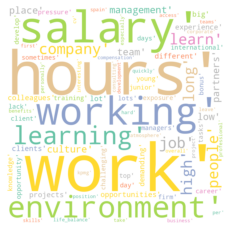

In [52]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
kpmg_words = df_kpmg.review
kpmg_words_list = [word for line in kpmg_words.astype(str) for word in line.split()]
kpmg_wordcounts = Counter(kpmg_words_list).most_common(100)

# creating a word counts dataframe
df_kpmg_wordcounts = pd.DataFrame(kpmg_wordcounts)
df_kpmg_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
kpmg_wordcounts_text = " ".join(word for word in df_kpmg_wordcounts.word)

    ## create the wordcloud object
kpmg_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(kpmg_wordcounts_text)

    ## display the generated image
plt.imshow(kpmg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [53]:
#TOPIC MODELING

# accenture corpus
kpmglda = df_kpmg.values.tolist()
kpmglda_words = list(sent_to_words(kpmglda))

# remove stop words
kpmglda_words = remove_stopwords(kpmglda_words)

# Create Dictionary
id2word_kpmg = corpora.Dictionary(kpmglda_words)

# Create Corpus
texts_kpmg = kpmglda_words

# Term Document Frequency
kpmglda_corpus = [id2word_kpmg.doc2bow(text) for text in texts_kpmg]

# number of topics
num_topics = 10

# Build LDA model
kpmglda_model = gensim.models.LdaMulticore(corpus=kpmglda_corpus,
                                           id2word=id2word_kpmg,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=1000,
                                           passes=10)

# Print the Keyword in the topics
pprint(kpmglda_model.print_topics())
kpmglda_doc = kpmglda_model[kpmglda_corpus]

#Coherence Score 
coherence_kpmglda_model = CoherenceModel(model=kpmglda_model, texts=texts_kpmg, dictionary=id2word_kpmg, coherence='c_v')
coherence_kpmglda = coherence_kpmglda_model.get_coherence()
print('Coherence Score: ', coherence_kpmglda)

[(0,
  '0.029*"salary" + 0.022*"learning" + 0.019*"working" + 0.016*"work" + '
  '0.016*"lot" + 0.016*"team" + 0.015*"culture" + 0.012*"professional" + '
  '0.012*"learn" + 0.012*"job"'),
 (1,
  '0.025*"bonus" + 0.020*"work" + 0.017*"training" + 0.015*"lot" + '
  '0.010*"days" + 0.010*"worldwide" + 0.010*"longer" + 0.010*"respect" + '
  '0.010*"company" + 0.010*"big"'),
 (2,
  '0.054*"hours" + 0.039*"long" + 0.031*"work" + 0.030*"salary" + '
  '0.024*"people" + 0.018*"projects" + 0.018*"working" + 0.015*"big" + '
  '0.014*"low" + 0.012*"opportunities"'),
 (3,
  '0.033*"hours" + 0.024*"working" + 0.019*"place" + 0.015*"salary" + '
  '0.015*"brand" + 0.015*"career" + 0.015*"learning" + 0.015*"big" + '
  '0.015*"colleagues" + 0.010*"experience"'),
 (4,
  '0.028*"work" + 0.017*"projects" + 0.017*"opportunities" + 0.012*"hard" + '
  '0.012*"development" + 0.012*"interesting" + 0.012*"top" + 0.012*"partners" '
  '+ 0.012*"together" + 0.012*"challenging"'),
 (5,
  '0.051*"environment" + 0.027

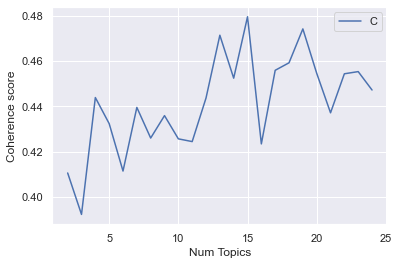

In [55]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_kpmg, corpus=kpmglda_corpus, texts=texts_kpmg, start=2, limit=25, step=1)

# Show graph
limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (KPMG)"), loc='best')
plt.show()

In [56]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.4106
LDA model with nº Topics = 3 has a Coherence value of 0.3923
LDA model with nº Topics = 4 has a Coherence value of 0.4438
LDA model with nº Topics = 5 has a Coherence value of 0.4323
LDA model with nº Topics = 6 has a Coherence value of 0.4114
LDA model with nº Topics = 7 has a Coherence value of 0.4395
LDA model with nº Topics = 8 has a Coherence value of 0.426
LDA model with nº Topics = 9 has a Coherence value of 0.4359
LDA model with nº Topics = 10 has a Coherence value of 0.4256
LDA model with nº Topics = 11 has a Coherence value of 0.4244
LDA model with nº Topics = 12 has a Coherence value of 0.4436
LDA model with nº Topics = 13 has a Coherence value of 0.4713
LDA model with nº Topics = 14 has a Coherence value of 0.4524
LDA model with nº Topics = 15 has a Coherence value of 0.4795
LDA model with nº Topics = 16 has a Coherence value of 0.4234
LDA model with nº Topics = 17 has a Coherence value of 0.4559
LDA model with nº

In [57]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 15

# Building LDA model
lda_modeladjusted_kpmg = gensim.models.LdaMulticore(corpus=kpmglda_corpus,
                                       id2word=id2word_kpmg,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_kpmg.print_topics())
doc_ldaadjusted_kpmg = lda_modeladjusted_kpmg[kpmglda_corpus]

[(0,
  '0.034*"salary" + 0.026*"learning" + 0.026*"competitive" + 0.018*"teams" + '
  '0.018*"environment" + 0.018*"opportunities" + 0.018*"team" + 0.009*"client" '
  '+ 0.009*"business" + 0.009*"areas"'),
 (1,
  '0.026*"work" + 0.024*"hours" + 0.018*"long" + 0.012*"environment" + '
  '0.012*"days" + 0.012*"pressure" + 0.012*"projects" + 0.012*"difficult" + '
  '0.012*"learning" + 0.012*"things"'),
 (2,
  '0.097*"salary" + 0.027*"low" + 0.027*"big" + 0.021*"hours" + '
  '0.017*"working" + 0.017*"people" + 0.017*"projects" + 0.016*"work" + '
  '0.016*"culture" + 0.014*"career"'),
 (3,
  '0.027*"place" + 0.016*"hours" + 0.016*"experience" + 0.016*"knowledge" + '
  '0.016*"benefits" + 0.016*"career" + 0.016*"learn" + 0.015*"leave" + '
  '0.015*"learning" + 0.011*"working"'),
 (4,
  '0.029*"work" + 0.017*"partners" + 0.017*"learn" + 0.012*"development" + '
  '0.012*"develop" + 0.012*"top" + 0.012*"career" + 0.012*"demanding" + '
  '0.012*"partner" + 0.012*"atmosphere"'),
 (5,
  '0.057*"wor

In [58]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_kpmg = gensimvis.prepare(lda_modeladjusted_kpmg, kpmglda_corpus, id2word_kpmg)
ldaadjustedviz_kpmg

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.050520  0.055788       1        1  10.981052
3      0.135449 -0.117211       2        1   8.877315
2     -0.119292 -0.103944       3        1   8.559709
4      0.130653 -0.045023       4        1   8.319816
12     0.066495  0.107495       5        1   8.032791
7     -0.044725 -0.096148       6        1   8.018987
1     -0.081734  0.056394       7        1   7.692045
13    -0.031865 -0.041786       8        1   7.279958
5     -0.102881  0.022322       9        1   6.533748
8      0.045687  0.056215      10        1   5.512922
9      0.024255  0.003554      11        1   5.096972
0     -0.034808  0.040233      12        1   4.561281
14     0.004023 -0.004190      13        1   3.892193
6     -0.034282  0.002754      14        1   3.428728
11    -0.007494  0.063547      15        1   3.212483, topic_info=           Term       Freq      Total Category  logprob  loglift
40       salary  22.000000  22.000000  Default  30.0000  30.0000
96        hours  24.000000  24.000000  Default  29.0000  29.0000
0       company  13.000000  13.000000  Default  28.0000  28.0000
401        long  13.000000  13.000000  Default  27.0000  27.0000
1          work  34.000000  34.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
0       company   1.142928  13.148238  Topic15  -3.7775   0.9954
104  management   0.589893   8.294214  Topic15  -4.4389   0.7948
26          big   0.589893  11.126822  Topic15  -4.4389   0.5010
242    managers   0.589893   7.047204  Topic15  -4.4389   0.9577
1          work   0.589893  34.582992  Topic15  -4.4389  -0.6331

[772 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
391       4  0.711272       able
47        1  0.352814     access
47        7  0.352814     access
47       10  0.352814     access
571       2  0.471860    account
...     ...       ...        ...
46        1  0.351231      young
46        4  0.175616      young
46        5  0.351231      young
46       13  0.175616      young
383      10  0.747735  yourselve

[971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 3, 5, 13, 8, 2, 14, 6, 9, 10, 1, 15, 7, 12])

In [59]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.kpmg.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_kpmg, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.kpmg.pickle', 'rb')
pickle_lda_modeladjusted_kpmg = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_kpmg)

LdaModel(num_terms=700, num_topics=15, decay=0.5, chunksize=1000)


### **EY**

In [60]:
# creating a dataframe only with the reviews about E&Y
df_ey = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'EY']
df_ey = df_ey.loc[:,['review']]
df_ey.head()

review
662  [atmosphere, opportunities, salary, colleagues...
663                         [atosphere, work, offices]
664         [work, team, alwais, willing, learn, grow]
665                                [environment, team]
666  [networking, opportunities, steep, learning_cu...

In [61]:
# how many reviews the english dataset have about E&Y?
df_ey.shape

(234, 1)

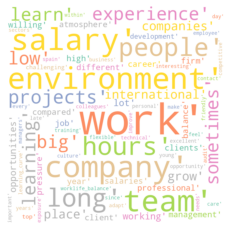

In [62]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
ey_words = df_ey.review
ey_words_list = [word for line in ey_words.astype(str) for word in line.split()]
ey_wordcounts = Counter(ey_words_list).most_common(100)

# creating a word counts dataframe
df_ey_wordcounts = pd.DataFrame(ey_wordcounts)
df_ey_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
ey_wordcounts_text = " ".join(word for word in df_ey_wordcounts.word)

    ## create the wordcloud object
ey_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(ey_wordcounts_text)

    ## display the generated image
plt.imshow(ey_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [63]:
#TOPIC MODELING

# accenture corpus
eylda = df_ey.values.tolist()
eylda_words = list(sent_to_words(eylda))

# remove stop words
eylda_words = remove_stopwords(eylda_words)

# Create Dictionary
id2word_ey = corpora.Dictionary(eylda_words)

# Create Corpus
texts_ey = eylda_words

# Term Document Frequency
eylda_corpus = [id2word_ey.doc2bow(text) for text in texts_ey]

# number of topics
num_topics = 10

# Build LDA model
eylda_model = gensim.models.LdaMulticore(corpus=eylda_corpus,
                                         id2word=id2word_ey,
                                         num_topics=num_topics,
                                         random_state=100,
                                         chunksize=1000,
                                         passes=10)

# Print the Keyword in the topics
pprint(eylda_model.print_topics())
eylda_doc = eylda_model[eylda_corpus]

#Coherence Score 
coherence_eylda_model = CoherenceModel(model=eylda_model, texts=texts_ey, dictionary=id2word_ey, coherence='c_v')
coherence_eylda = coherence_eylda_model.get_coherence()
print('Coherence Score: ', coherence_eylda)

[(0,
  '0.027*"work" + 0.025*"lot" + 0.021*"company" + 0.013*"environment" + '
  '0.013*"salary" + 0.010*"hours" + 0.009*"learning" + 0.009*"people" + '
  '0.009*"years" + 0.009*"important"'),
 (1,
  '0.055*"work" + 0.046*"team" + 0.036*"learning" + 0.023*"people" + '
  '0.022*"environment" + 0.019*"opportunities" + 0.013*"client" + '
  '0.012*"company" + 0.010*"development" + 0.009*"career"'),
 (2,
  '0.033*"sometimes" + 0.015*"experience" + 0.015*"clients" + 0.015*"know" + '
  '0.014*"worked" + 0.014*"might" + 0.014*"high" + 0.008*"management" + '
  '0.008*"projects" + 0.008*"knowledge"'),
 (3,
  '0.028*"environment" + 0.025*"opportunities" + 0.019*"working" + 0.019*"job" '
  '+ 0.014*"work" + 0.010*"demanding" + 0.010*"contact" + 0.010*"training" + '
  '0.010*"chance" + 0.010*"grow"'),
 (4,
  '0.074*"hours" + 0.051*"long" + 0.048*"work" + 0.030*"working" + '
  '0.020*"salary" + 0.020*"atmosphere" + 0.014*"people" + 0.012*"professional" '
  '+ 0.011*"pressure" + 0.011*"colleagues"'),

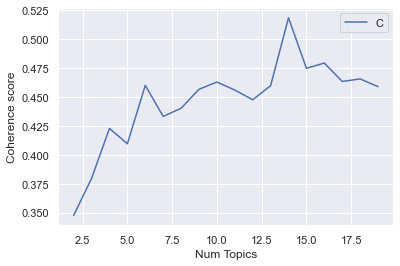

In [65]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_ey, corpus=eylda_corpus, texts=texts_ey, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (E&Y)"), loc='best')
plt.show()

In [66]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3475
LDA model with nº Topics = 3 has a Coherence value of 0.3795
LDA model with nº Topics = 4 has a Coherence value of 0.4228
LDA model with nº Topics = 5 has a Coherence value of 0.4095
LDA model with nº Topics = 6 has a Coherence value of 0.46
LDA model with nº Topics = 7 has a Coherence value of 0.4331
LDA model with nº Topics = 8 has a Coherence value of 0.4402
LDA model with nº Topics = 9 has a Coherence value of 0.4566
LDA model with nº Topics = 10 has a Coherence value of 0.4629
LDA model with nº Topics = 11 has a Coherence value of 0.456
LDA model with nº Topics = 12 has a Coherence value of 0.4475
LDA model with nº Topics = 13 has a Coherence value of 0.4597
LDA model with nº Topics = 14 has a Coherence value of 0.5185
LDA model with nº Topics = 15 has a Coherence value of 0.4748
LDA model with nº Topics = 16 has a Coherence value of 0.4793
LDA model with nº Topics = 17 has a Coherence value of 0.4634
LDA model with nº T

In [67]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 14

# Building LDA model
lda_modeladjusted_ey = gensim.models.LdaMulticore(corpus=eylda_corpus,
                                                  id2word=id2word_ey,
                                                  num_topics=num_topics,
                                                  random_state=100,
                                                  chunksize=1000,
                                                  passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_ey.print_topics())
doc_ldaadjusted_ey = lda_modeladjusted_ey[eylda_corpus]

[(0,
  '0.057*"learning" + 0.024*"low" + 0.024*"clients" + 0.024*"colleagues" + '
  '0.024*"professional" + 0.022*"salary" + 0.016*"side" + 0.016*"competition" '
  '+ 0.016*"coworkers" + 0.016*"experience"'),
 (1,
  '0.062*"work" + 0.044*"people" + 0.033*"team" + 0.029*"opportunities" + '
  '0.020*"company" + 0.019*"projects" + 0.015*"clients" + 0.015*"client" + '
  '0.013*"grow" + 0.010*"interesting"'),
 (2,
  '0.027*"clients" + 0.027*"interesting" + 0.027*"carreer" + 0.026*"projects" '
  '+ 0.025*"work" + 0.018*"management" + 0.018*"lack" + 0.018*"poor" + '
  '0.010*"opportunities" + 0.009*"top"'),
 (3,
  '0.067*"environment" + 0.036*"work" + 0.029*"learning" + 0.027*"working" + '
  '0.021*"opportunities" + 0.014*"chance" + 0.014*"international" + '
  '0.014*"experience" + 0.014*"projects" + 0.014*"demanding"'),
 (4,
  '0.048*"hours" + 0.041*"work" + 0.041*"working" + 0.031*"long" + '
  '0.017*"companies" + 0.017*"different" + 0.017*"team" + 0.017*"pressure" + '
  '0.012*"sectors" + 

In [68]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_ey = gensimvis.prepare(lda_modeladjusted_ey, eylda_corpus, id2word_ey)
ldaadjustedviz_ey

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.023239 -0.034728       1        1  10.826317
11     0.040033 -0.162456       2        1  10.350267
13     0.057400 -0.041139       3        1   9.751332
1     -0.012628  0.115621       4        1   8.962553
5      0.196552 -0.018118       5        1   8.353442
4      0.137085  0.088476       6        1   7.945857
9     -0.068398 -0.062917       7        1   7.083715
7     -0.038816  0.116089       8        1   6.905093
10    -0.084419  0.001155       9        1   6.586470
3     -0.041098  0.038072      10        1   6.217727
0     -0.062132 -0.089752      11        1   4.964878
12    -0.084757 -0.017723      12        1   4.920663
2     -0.038801  0.069571      13        1   4.402525
6     -0.023261 -0.002150      14        1   2.729162, topic_info=            Term       Freq      Total Category  logprob  loglift
71         hours  27.000000  27.000000  Default  30.0000  30.0000
421         long  15.000000  15.000000  Default  29.0000  29.0000
13   environment  18.000000  18.000000  Default  28.0000  28.0000
3         salary  23.000000  23.000000  Default  27.0000  27.0000
7           work  37.000000  37.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
260        spain   0.556349   2.716821  Topic14  -4.3542   2.0154
12       willing   0.555354   3.973758  Topic14  -4.3559   1.6333
36           big   0.555376  11.612751  Topic14  -4.3559   0.5610
665    mentoring   0.037024   1.278387  Topic14  -7.0640   0.0594
7           work   0.671962  37.877686  Topic14  -4.1653  -0.4307

[724 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
18       10  0.748617       ability
95        2  0.701986    acceptable
85       10  0.748616        access
231       9  0.738548    accessible
635       3  0.701103  achievements
...     ...       ...           ...
280       1  0.210205         young
280       7  0.210205         young
280       9  0.210205         young
280      10  0.210205         young
280      12  0.210205         young

[897 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 12, 14, 2, 6, 5, 10, 8, 11, 4, 1, 13, 3, 7])

In [69]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.ey.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_ey, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.ey.pickle', 'rb')
pickle_lda_modeladjusted_ey = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_ey)

LdaModel(num_terms=717, num_topics=14, decay=0.5, chunksize=1000)


    C. Startups (unicorns)

Based in Barcelona: Glovo, Travelperk, Typeform

### **GLOVO**

In [70]:
# creating a dataframe only with the reviews about Glovo
df_glovo = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Glovo']
df_glovo = df_ey.loc[:,['review']]
df_glovo.head()

review
662  [atmosphere, opportunities, salary, colleagues...
663                         [atosphere, work, offices]
664         [work, team, alwais, willing, learn, grow]
665                                [environment, team]
666  [networking, opportunities, steep, learning_cu...

In [71]:
# how many reviews the english dataset have about Glovo?
df_glovo.shape

(234, 1)

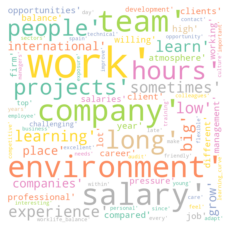

In [72]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
glovo_words = df_glovo.review
glovo_words_list = [word for line in glovo_words.astype(str) for word in line.split()]
glovo_wordcounts = Counter(glovo_words_list).most_common(100)

# creating a word counts dataframe
df_glovo_wordcounts = pd.DataFrame(glovo_wordcounts)
df_glovo_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
glovo_wordcounts_text = " ".join(word for word in df_glovo_wordcounts.word)

    ## create the wordcloud object
glovo_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(glovo_wordcounts_text)

    ## display the generated image
plt.imshow(glovo_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [73]:
#TOPIC MODELING

# accenture corpus
glovolda = df_glovo.values.tolist()
glovolda_words = list(sent_to_words(glovolda))

# remove stop words
glovolda_words = remove_stopwords(glovolda_words)

# Create Dictionary
id2word_glovo = corpora.Dictionary(glovolda_words)

# Create Corpus
texts_glovo = glovolda_words

# Term Document Frequency
glovolda_corpus = [id2word_glovo.doc2bow(text) for text in texts_glovo]

# number of topics
num_topics = 10

# Build LDA model
glovolda_model = gensim.models.LdaMulticore(corpus=glovolda_corpus,
                                            id2word=id2word_glovo,
                                            num_topics=num_topics,
                                            random_state=100,
                                            chunksize=1000,
                                            passes=10)

# Print the Keyword in the topics
pprint(glovolda_model.print_topics())
glovolda_doc = glovolda_model[glovolda_corpus]

#Coherence Score 
coherence_glovolda_model = CoherenceModel(model=glovolda_model, texts=texts_glovo, dictionary=id2word_glovo, coherence='c_v')
coherence_glovolda = coherence_glovolda_model.get_coherence()
print('Coherence Score: ', coherence_glovolda)

[(0,
  '0.027*"work" + 0.025*"lot" + 0.021*"company" + 0.013*"environment" + '
  '0.013*"salary" + 0.010*"hours" + 0.009*"learning" + 0.009*"people" + '
  '0.009*"years" + 0.009*"important"'),
 (1,
  '0.055*"work" + 0.046*"team" + 0.036*"learning" + 0.023*"people" + '
  '0.022*"environment" + 0.019*"opportunities" + 0.013*"client" + '
  '0.012*"company" + 0.010*"development" + 0.009*"career"'),
 (2,
  '0.033*"sometimes" + 0.015*"experience" + 0.015*"clients" + 0.015*"know" + '
  '0.014*"worked" + 0.014*"might" + 0.014*"high" + 0.008*"management" + '
  '0.008*"projects" + 0.008*"knowledge"'),
 (3,
  '0.028*"environment" + 0.025*"opportunities" + 0.019*"working" + 0.019*"job" '
  '+ 0.014*"work" + 0.010*"demanding" + 0.010*"contact" + 0.010*"training" + '
  '0.010*"chance" + 0.010*"grow"'),
 (4,
  '0.074*"hours" + 0.051*"long" + 0.048*"work" + 0.030*"working" + '
  '0.020*"salary" + 0.020*"atmosphere" + 0.014*"people" + 0.012*"professional" '
  '+ 0.011*"pressure" + 0.011*"colleagues"'),

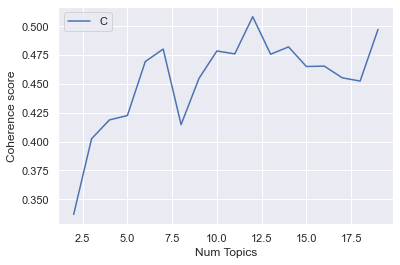

In [76]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_glovo, corpus=glovolda_corpus, texts=texts_glovo, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Glovo)"), loc='best')
plt.show()

In [77]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3368
LDA model with nº Topics = 3 has a Coherence value of 0.4024
LDA model with nº Topics = 4 has a Coherence value of 0.4188
LDA model with nº Topics = 5 has a Coherence value of 0.4226
LDA model with nº Topics = 6 has a Coherence value of 0.4694
LDA model with nº Topics = 7 has a Coherence value of 0.4802
LDA model with nº Topics = 8 has a Coherence value of 0.4147
LDA model with nº Topics = 9 has a Coherence value of 0.4548
LDA model with nº Topics = 10 has a Coherence value of 0.4785
LDA model with nº Topics = 11 has a Coherence value of 0.476
LDA model with nº Topics = 12 has a Coherence value of 0.5082
LDA model with nº Topics = 13 has a Coherence value of 0.4757
LDA model with nº Topics = 14 has a Coherence value of 0.4821
LDA model with nº Topics = 15 has a Coherence value of 0.4651
LDA model with nº Topics = 16 has a Coherence value of 0.4654
LDA model with nº Topics = 17 has a Coherence value of 0.4553
LDA model with nº

In [78]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 12

# Building LDA model
lda_modeladjusted_glovo = gensim.models.LdaMulticore(corpus=glovolda_corpus,
                                                     id2word=id2word_glovo,
                                                     num_topics=num_topics,
                                                     random_state=100,
                                                     chunksize=1000,
                                                     passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_glovo.print_topics())
doc_ldaadjusted_glovo = lda_modeladjusted_glovo[glovolda_corpus]

[(0,
  '0.033*"lot" + 0.033*"company" + 0.020*"work" + 0.016*"big" + 0.016*"young" '
  '+ 0.016*"people" + 0.011*"low" + 0.011*"salary" + 0.011*"seem" + '
  '0.011*"years"'),
 (1,
  '0.033*"people" + 0.029*"work" + 0.029*"company" + 0.026*"projects" + '
  '0.024*"team" + 0.020*"interesting" + 0.019*"experience" + '
  '0.019*"opportunities" + 0.015*"project" + 0.015*"international"'),
 (2,
  '0.024*"highly" + 0.016*"experience" + 0.016*"firm" + 0.016*"big" + '
  '0.016*"people" + 0.016*"high" + 0.016*"opportunities" + 0.016*"amount" + '
  '0.016*"seek" + 0.016*"salary"'),
 (3,
  '0.037*"work" + 0.037*"environment" + 0.034*"opportunities" + '
  '0.024*"working" + 0.023*"atmosphere" + 0.019*"learning" + '
  '0.018*"international" + 0.018*"grow" + 0.014*"place" + 0.012*"top"'),
 (4,
  '0.118*"hours" + 0.075*"long" + 0.068*"work" + 0.038*"working" + '
  '0.028*"team" + 0.028*"sometimes" + 0.013*"companies" + 0.013*"different" + '
  '0.013*"development" + 0.012*"might"'),
 (5,
  '0.031*"prof

In [79]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_glovo = gensimvis.prepare(lda_modeladjusted_glovo, glovolda_corpus, id2word_glovo)
ldaadjustedviz_glovo

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.162150 -0.107979       1        1  11.244878
11     0.172070 -0.022879       2        1  10.549364
7     -0.052815  0.092875       3        1  10.387308
10     0.032190 -0.137959       4        1   9.428947
1     -0.068768  0.118601       5        1   9.163896
5     -0.021655  0.004998       6        1   8.541899
8      0.055930 -0.035862       7        1   8.250707
0      0.050798  0.046555       8        1   8.036164
3     -0.034138  0.042738       9        1   7.641476
6     -0.037747 -0.070628      10        1   6.125739
9      0.006924  0.031582      11        1   5.865326
2      0.059362  0.037958      12        1   4.764296, topic_info=               Term       Freq      Total Category  logprob  loglift
71            hours  27.000000  27.000000  Default  30.0000  30.0000
421            long  15.000000  15.000000  Default  29.0000  29.0000
3            salary  21.000000  21.000000  Default  28.0000  28.0000
7              work  38.000000  38.000000  Default  27.0000  27.0000
11             team  12.000000  12.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
3            salary   1.172347  21.999821  Topic12  -4.1659   0.1120
122            lots   0.646334   2.689171  Topic12  -4.7614   1.6183
72         learning   0.646333  13.265684  Topic12  -4.7614   0.0224
360     flexibility   0.646333   2.625479  Topic12  -4.7614   1.6423
362  responsibility   0.646332   2.670999  Topic12  -4.7614   1.6251

[645 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
18        1  0.708858       ability
85        9  0.725515        access
231      12  0.781982    accessible
635       8  0.733334  achievements
583       4  0.711203        actual
...     ...       ...           ...
265       9  0.725515          york
280       2  0.210857         young
280       7  0.210857         young
280       8  0.421713         young
280      10  0.210857         young

[829 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 12, 8, 11, 2, 6, 9, 1, 4, 7, 10, 3])

In [80]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.glovo.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_glovo, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.glovo.pickle', 'rb')
pickle_lda_modeladjusted_glovo = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_glovo)

LdaModel(num_terms=717, num_topics=12, decay=0.5, chunksize=1000)


### **TRAVELPERK**

In [85]:
# creating a dataframe only with the reviews about Travelperk
df_travelperk = mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'TravelPerk']
df_travelperk = df_travelperk.loc[:,['review']]
df_travelperk.head()

review
1480  [team, fun, engaging, real, family, atmosphere...
1481  [travelperk, culture, completely, incomparable...
1482  [people, team, environment, benefits, atmosphere]
1483                 [moment, days, lot, buzz, feeling]
1484  [environment, competitive, pay, entertaining, ...

In [86]:
# how many reviews the english dataset have about Travelperk?
df_travelperk.shape

(176, 1)

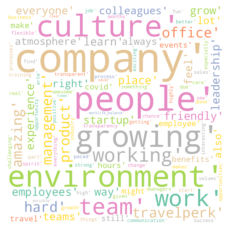

In [87]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
travelperk_words = df_travelperk.review
travelperk_words_list = [word for line in travelperk_words.astype(str) for word in line.split()]
travelperk_wordcounts = Counter(travelperk_words_list).most_common(100)

# creating a word counts dataframe
df_travelperk_wordcounts = pd.DataFrame(travelperk_wordcounts)
df_travelperk_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
travelperk_wordcounts_text = " ".join(word for word in df_travelperk_wordcounts.word)

    ## create the wordcloud object
travelperk_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(travelperk_wordcounts_text)

    ## display the generated image
plt.imshow(travelperk_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [94]:
#TOPIC MODELING

# accenture corpus
travelperklda = df_travelperk.values.tolist()
travelperklda_words = list(sent_to_words(travelperklda))

# remove stop words
travelperklda_words = remove_stopwords(travelperklda_words)

# Create Dictionary
id2word_travelperk = corpora.Dictionary(travelperklda_words)

# Create Corpus
texts_travelperk = travelperklda_words

# Term Document Frequency
travelperklda_corpus = [id2word_travelperk.doc2bow(text) for text in texts_travelperk]

# number of topics
num_topics = 10

# Build LDA model
travelperklda_model = gensim.models.LdaMulticore(corpus=travelperklda_corpus,
                                                 id2word=id2word_travelperk,
                                                 num_topics=num_topics,
                                                 random_state=100,
                                                 chunksize=1000,
                                                 passes=10)

# Print the Keyword in the topics
pprint(travelperklda_model.print_topics())
travelperklda_doc = travelperklda_model[travelperklda_corpus]

#Coherence Score 
coherence_travelperklda_model = CoherenceModel(model=travelperklda_model, texts=texts_travelperk, dictionary=id2word_travelperk, coherence='c_v')
coherence_travelperklda = coherence_travelperklda_model.get_coherence()
print('Coherence Score: ', coherence_travelperklda)

[(0,
  '0.030*"company" + 0.023*"working" + 0.017*"erte" + 0.015*"hard" + '
  '0.014*"work" + 0.012*"team" + 0.012*"hours" + 0.009*"far" + '
  '0.009*"travelperk" + 0.009*"us"'),
 (1,
  '0.017*"change" + 0.010*"work" + 0.010*"team" + 0.010*"way" + '
  '0.010*"travelperk" + 0.010*"people" + 0.010*"experience" + 0.007*"company" '
  '+ 0.007*"teams" + 0.007*"moment"'),
 (2,
  '0.026*"environment" + 0.021*"company" + 0.020*"working" + 0.016*"team" + '
  '0.016*"work" + 0.016*"growing" + 0.013*"office" + 0.010*"travelperk" + '
  '0.010*"product" + 0.010*"flexible"'),
 (3,
  '0.015*"travelperk" + 0.013*"amazing" + 0.013*"office" + 0.012*"environment" '
  '+ 0.010*"company" + 0.009*"work" + 0.009*"say" + 0.006*"product" + '
  '0.006*"people" + 0.006*"clear"'),
 (4,
  '0.032*"company" + 0.023*"team" + 0.017*"culture" + 0.015*"management" + '
  '0.012*"travelperk" + 0.012*"amazing" + 0.012*"leadership" + 0.012*"strong" '
  '+ 0.009*"care" + 0.009*"communication"'),
 (5,
  '0.036*"company" + 0.0

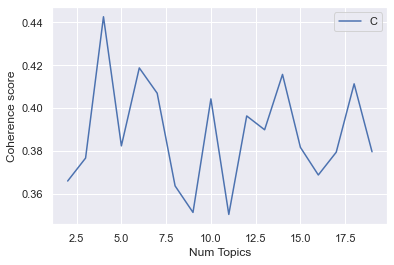

In [95]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_travelperk, corpus=travelperklda_corpus, texts=texts_travelperk, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Travelperk)"), loc='best')
plt.show()

In [96]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.3659
LDA model with nº Topics = 3 has a Coherence value of 0.3766
LDA model with nº Topics = 4 has a Coherence value of 0.4427
LDA model with nº Topics = 5 has a Coherence value of 0.3823
LDA model with nº Topics = 6 has a Coherence value of 0.4188
LDA model with nº Topics = 7 has a Coherence value of 0.4069
LDA model with nº Topics = 8 has a Coherence value of 0.3636
LDA model with nº Topics = 9 has a Coherence value of 0.3513
LDA model with nº Topics = 10 has a Coherence value of 0.4043
LDA model with nº Topics = 11 has a Coherence value of 0.3503
LDA model with nº Topics = 12 has a Coherence value of 0.3963
LDA model with nº Topics = 13 has a Coherence value of 0.3899
LDA model with nº Topics = 14 has a Coherence value of 0.4157
LDA model with nº Topics = 15 has a Coherence value of 0.3816
LDA model with nº Topics = 16 has a Coherence value of 0.3687
LDA model with nº Topics = 17 has a Coherence value of 0.3794
LDA model with n

In [97]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 4

# Building LDA model
lda_modeladjusted_travelperk = gensim.models.LdaMulticore(corpus=travelperklda_corpus,
                                       id2word=id2word_travelperk,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_travelperk.print_topics())
doc_ldaadjusted_travelperk = lda_modeladjusted_travelperk[travelperklda_corpus]

[(0,
  '0.028*"company" + 0.015*"people" + 0.011*"culture" + 0.011*"working" + '
  '0.011*"travelperk" + 0.011*"work" + 0.008*"everyone" + 0.008*"management" + '
  '0.008*"team" + 0.008*"hard"'),
 (1,
  '0.018*"team" + 0.013*"company" + 0.012*"culture" + 0.010*"moment" + '
  '0.009*"way" + 0.009*"work" + 0.008*"management" + 0.008*"hard" + '
  '0.008*"travelperk" + 0.007*"lot"'),
 (2,
  '0.027*"company" + 0.024*"environment" + 0.017*"working" + 0.014*"team" + '
  '0.012*"work" + 0.012*"office" + 0.009*"growing" + 0.007*"friendly" + '
  '0.007*"processes" + 0.007*"startup"'),
 (3,
  '0.029*"company" + 0.020*"people" + 0.015*"amazing" + 0.011*"environment" + '
  '0.010*"atmosphere" + 0.010*"team" + 0.009*"travelperk" + 0.009*"work" + '
  '0.008*"office" + 0.007*"product"')]


In [93]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_travelperk = gensimvis.prepare(lda_modeladjusted_travelperk, travelperklda_corpus, id2word_travelperk)
ldaadjustedviz_travelperk

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.108614 -0.013155       1        1  34.107682
3     -0.033835  0.041975       2        1  25.138093
1     -0.048484 -0.094248       3        1  20.666899
2     -0.026296  0.065428       4        1  20.087325, topic_info=            Term       Freq      Total Category  logprob  loglift
54   environment  23.000000  23.000000  Default  30.0000  30.0000
59        moment   6.000000   6.000000  Default  29.0000  29.0000
30       amazing  15.000000  15.000000  Default  28.0000  28.0000
142      working  21.000000  21.000000  Default  27.0000  27.0000
27           way   7.000000   7.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
368        might   2.133456   6.009880   Topic4  -5.4431   0.5694
167         hard   2.791034  14.113417   Topic4  -5.1744  -0.0156
19       product   2.752550  13.520282   Topic4  -5.1883   0.0134
114       always   2.147963   6.952687   Topic4  -5.4363   0.4305
47        people   2.688227  29.414647   Topic4  -5.2119  -0.7875

[274 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
286       4  0.739715   across
1010      3  0.737445  adverse
485       2  0.954539      aim
259       4  0.497837    along
29        1  0.608953     also
...     ...       ...      ...
142       1  0.413263  working
142       2  0.091836  working
142       3  0.091836  working
142       4  0.413263  working
121       2  0.858174    world

[390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [98]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.travelperk.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_travelperk, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.travelperk.pickle', 'rb')
pickle_lda_modeladjusted_travelperk = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_travelperk)

LdaModel(num_terms=1043, num_topics=4, decay=0.5, chunksize=1000)


### **TYPEFORM**

In [99]:
# creating a dataframe only with the reviews about Typeform
df_typeform= mixdata_advancedpreprocess_tokenized.loc[mixdata_advancedpreprocess_tokenized.loc[:,'company'] == 'Typeform']
df_typeform = df_typeform.loc[:,['review']]
df_typeform.head()

review
1568  [communication, among, team, members, chill, a...
1569  [ive, employee, typeform, year, till, say, ama...
1570  [typeform, takes, care, people, pandemic, hit,...
1571  [started, working, typeform, months_ago, tell,...
1572  [amazing, experience, welcoming, team, ready, ...

In [100]:
# how many reviews the english dataset have about Typeform?
df_typeform.shape

(134, 1)

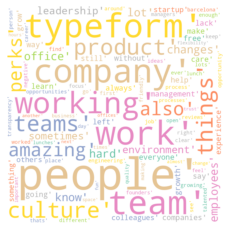

In [101]:
# LET'S START HAVING A LOOK TO THE 100 MOST COMMON WORDS OR 'TOP WORDS'

# creating list of the most common words
typeform_words = df_typeform.review
typeform_words_list = [word for line in typeform_words.astype(str) for word in line.split()]
typeform_wordcounts = Counter(typeform_words_list).most_common(100)

# creating a word counts dataframe
df_typeform_wordcounts = pd.DataFrame(typeform_wordcounts)
df_typeform_wordcounts.columns = ['word', 'frequency']

# word cloud visualization
    ## select all the words of the dataframe:
typeform_wordcounts_text = " ".join(word for word in df_typeform_wordcounts.word)

    ## create the wordcloud object
typeform_wordcloud = WordCloud(width=1000, height=1000, margin=5, max_words=100, background_color="white", colormap='Set2').generate(typeform_wordcounts_text)

    ## display the generated image
plt.imshow(typeform_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [114]:
#TOPIC MODELING

# accenture corpus
typeformlda = df_typeform.values.tolist()
typeformlda_words = list(sent_to_words(typeformlda))

# remove stop words
typeformlda_words = remove_stopwords(typeformlda_words)

# Create Dictionary
id2word_typeform = corpora.Dictionary(typeformlda_words)

# Create Corpus
texts_typeform = typeformlda_words

# Term Document Frequency
typeformlda_corpus = [id2word_typeform.doc2bow(text) for text in texts_typeform]

# number of topics
num_topics = 8

# Build LDA model
typeformlda_model = gensim.models.LdaMulticore(corpus=typeformlda_corpus,
                                               id2word=id2word_typeform,
                                               num_topics=num_topics,
                                               random_state=100,
                                               chunksize=1000,
                                               passes=10)

# Print the Keyword in the topics
pprint(typeformlda_model.print_topics())
typeformlda_doc = typeformlda_model[typeformlda_corpus]

#Coherence Score 
coherence_typeformlda_model = CoherenceModel(model=typeformlda_model, texts=texts_typeform, dictionary=id2word_typeform, coherence='c_v')
coherence_typeformlda = coherence_typeformlda_model.get_coherence()
print('Coherence Score: ', coherence_typeformlda)

[(0,
  '0.022*"company" + 0.020*"people" + 0.013*"typeform" + 0.009*"things" + '
  '0.009*"also" + 0.009*"make" + 0.008*"work" + 0.007*"changes" + '
  '0.007*"culture" + 0.007*"help"'),
 (1,
  '0.018*"people" + 0.016*"company" + 0.010*"team" + 0.009*"employees" + '
  '0.008*"management" + 0.008*"left" + 0.007*"working" + 0.007*"lack" + '
  '0.006*"ceo" + 0.006*"hires"'),
 (2,
  '0.023*"people" + 0.012*"company" + 0.010*"typeform" + 0.009*"work" + '
  '0.009*"working" + 0.008*"leadership" + 0.007*"pay" + 0.006*"companies" + '
  '0.006*"things" + 0.005*"changes"'),
 (3,
  '0.018*"company" + 0.013*"culture" + 0.011*"typeform" + 0.010*"people" + '
  '0.009*"teams" + 0.009*"amazing" + 0.008*"perks" + 0.008*"team" + '
  '0.007*"change" + 0.006*"trying"'),
 (4,
  '0.016*"people" + 0.011*"sometimes" + 0.011*"company" + 0.009*"working" + '
  '0.008*"without" + 0.007*"team" + 0.007*"know" + 0.006*"feel" + '
  '0.005*"leadership" + 0.005*"typeform"'),
 (5,
  '0.029*"people" + 0.019*"work" + 0.009

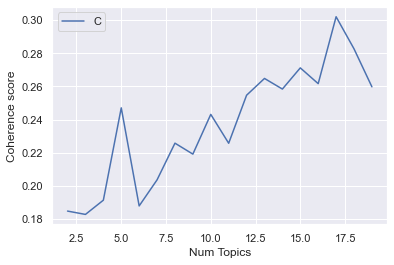

In [115]:
# COHERENCE SCORE VALUES

model_list, coherence_values = compute_coherence_values(dictionary=id2word_typeform, corpus=typeformlda_corpus, texts=texts_typeform, start=2, limit=20, step=1)

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence values (Typeform)"), loc='best')
plt.show()

In [116]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('LDA model with nº Topics =', m, 'has a Coherence value of', round(cv, 4))

LDA model with nº Topics = 2 has a Coherence value of 0.1849
LDA model with nº Topics = 3 has a Coherence value of 0.1828
LDA model with nº Topics = 4 has a Coherence value of 0.1914
LDA model with nº Topics = 5 has a Coherence value of 0.2471
LDA model with nº Topics = 6 has a Coherence value of 0.188
LDA model with nº Topics = 7 has a Coherence value of 0.2037
LDA model with nº Topics = 8 has a Coherence value of 0.2258
LDA model with nº Topics = 9 has a Coherence value of 0.2192
LDA model with nº Topics = 10 has a Coherence value of 0.2432
LDA model with nº Topics = 11 has a Coherence value of 0.2257
LDA model with nº Topics = 12 has a Coherence value of 0.2547
LDA model with nº Topics = 13 has a Coherence value of 0.2648
LDA model with nº Topics = 14 has a Coherence value of 0.2584
LDA model with nº Topics = 15 has a Coherence value of 0.2712
LDA model with nº Topics = 16 has a Coherence value of 0.2617
LDA model with nº Topics = 17 has a Coherence value of 0.302
LDA model with nº 

In [117]:
# LDA MODEL ADJUSTED REGARDING TO THE Nº TOPICS MOST SUITABLE, IN RELATION TO THE COHERENCE SCORE VALUES

# number of topics
num_topics = 17

# Building LDA model
lda_modeladjusted_typeform = gensim.models.LdaMulticore(corpus=typeformlda_corpus,
                                       id2word=id2word_typeform,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10)

# Print the Keyword in the topics
pprint(lda_modeladjusted_typeform.print_topics())
doc_ldaadjusted_typeform = lda_modeladjusted_typeform[typeformlda_corpus]

[(0,
  '0.021*"company" + 0.018*"people" + 0.015*"typeform" + 0.014*"make" + '
  '0.010*"working" + 0.008*"culture" + 0.008*"also" + 0.008*"grow" + '
  '0.008*"sometimes" + 0.008*"team"'),
 (1,
  '0.020*"people" + 0.015*"company" + 0.012*"team" + 0.010*"working" + '
  '0.009*"hires" + 0.009*"lack" + 0.009*"point" + 0.009*"teams" + 0.008*"left" '
  '+ 0.008*"managers"'),
 (2,
  '0.011*"people" + 0.011*"growth" + 0.011*"organization" + 0.011*"day" + '
  '0.011*"growing" + 0.006*"work" + 0.006*"still" + 0.006*"company" + '
  '0.006*"professionals" + 0.006*"everyone"'),
 (3,
  '0.016*"company" + 0.016*"amazing" + 0.016*"culture" + 0.016*"perks" + '
  '0.010*"typeform" + 0.010*"colleagues" + 0.010*"teams" + '
  '0.010*"opportunities" + 0.007*"team" + 0.007*"leadership"'),
 (4,
  '0.021*"sometimes" + 0.011*"working" + 0.011*"leadership" + 0.011*"lack" + '
  '0.011*"since" + 0.011*"anything" + 0.011*"understand" + 0.011*"workers" + '
  '0.006*"people" + 0.006*"fired"'),
 (5,
  '0.027*"people"

In [118]:
# TOPICS MODEL VISUALIZATION

pyLDAvis.enable_notebook()
ldaadjustedviz_typeform = gensimvis.prepare(lda_modeladjusted_typeform, typeformlda_corpus, id2word_typeform)
ldaadjustedviz_typeform

/home/dsc/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.105355 -0.046830       1        1  14.167818
0     -0.112326 -0.044011       2        1  13.939659
13    -0.057237  0.066312       3        1  12.109763
1     -0.075961  0.151849       4        1  10.927151
12    -0.095740 -0.065772       5        1   8.722026
15     0.083927 -0.156840       6        1   7.730194
14    -0.068013 -0.012695       7        1   6.550862
11    -0.041735 -0.028684       8        1   6.060517
3      0.007021 -0.023458       9        1   4.729987
16     0.059346  0.061329      10        1   3.055100
7      0.005123  0.015777      11        1   2.298478
4      0.065025  0.049954      12        1   2.043257
2      0.073244 -0.002513      13        1   1.978171
10     0.112058  0.028748      14        1   1.969480
8      0.033371  0.003503      15        1   1.750692
6      0.051401 -0.005594      16        1   1.686150
9      0.065849  0.008924      17        1   0.280694, topic_info=           Term       Freq      Total Category  logprob  loglift
13      company  59.000000  59.000000  Default  30.0000  30.0000
235        work  41.000000  41.000000  Default  29.0000  29.0000
206       perks  18.000000  18.000000  Default  28.0000  28.0000
563   sometimes  12.000000  12.000000  Default  27.0000  27.0000
59       people  81.000000  81.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
218     towards   0.006853   3.696659  Topic17  -7.4954  -0.4148
88      culture   0.006853  23.709601  Topic17  -7.4954  -2.2733
104     product   0.006849  24.609786  Topic17  -7.4960  -2.3112
27     everyone   0.006849  11.812481  Topic17  -7.4961  -1.5772
521  management   0.006848  15.147757  Topic17  -7.4961  -1.8260

[1104 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1653      5  0.712100        able
1695      6  0.716452      accept
1245      7  0.737967  acceptable
814       9  0.774689    accurate
1258      5  0.712100     achieve
...     ...       ...         ...
1124      9  0.774706    workload
1405     14  0.641606     writing
858       9  0.774724          xp
1269      3  0.688295      yesman
1136     15  0.652822       young

[1482 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 14, 2, 13, 16, 15, 12, 4, 17, 8, 5, 3, 11, 9, 7, 10])

In [119]:
#SERIALIZATION

# write and create pickle object
pickle_out = open('ldamodel.typeform.pickle', 'wb') #the file is empty at the momentent it is encoded in binary

# call pickle object to keep in memory
pickle.dump(lda_modeladjusted_typeform, pickle_out)
pickle_out.close()

# read and load pickle object
pickle_in = open('ldamodel.typeform.pickle', 'rb')
pickle_lda_modeladjusted_typeform = pickle.load(pickle_in)

# show
print(pickle_lda_modeladjusted_typeform)

LdaModel(num_terms=1719, num_topics=17, decay=0.5, chunksize=1000)


(*) interaction and observations detailed in memory

---------------------------------------